### Librerías a utilizar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

#Welch
from scipy import signal
from scipy.interpolate import interp1d
import numpy as np

#### 60dg

In [2]:
#Directorio a recorrer
path_mat = '/home/bryan/Escritorio/Ayudantías 2021/060619_Afternoon/'

def Ficheros(path, formato):
    contenido = os.listdir(path)

    #Acumulador del nombre de las   imagenes a utilizar
    archivos = []

    #Se recorre el path para obtener los nombre y se los aggrega al acumulador, en este caso la lista
    for fichero in contenido:
        if os.path.isfile(os.path.join(path, fichero)) and fichero.endswith(formato):
            archivos.append(fichero)
            
    return archivos


#Verificar si obtiene los archivos
Archivos = Ficheros(path_mat, '.csv')

dstream = []
ustream = []

for archivo in Archivos:
    if 'downstream' in archivo:
        dstream.append(archivo)
    elif 'upstream' in archivo:
        ustream.append(archivo)

In [3]:
dstream.sort()
ustream.sort()

In [4]:
dstream, ustream

(['Bent_cylinder_L100_downstream60deg_wind_speeds.csv',
  'Bent_cylinder_L100_downstream60deg_y0.csv',
  'Bent_cylinder_L100_downstream60deg_y1.csv',
  'Bent_cylinder_L100_downstream60deg_y10.csv',
  'Bent_cylinder_L100_downstream60deg_y2.csv',
  'Bent_cylinder_L100_downstream60deg_y3.csv',
  'Bent_cylinder_L100_downstream60deg_y4.csv',
  'Bent_cylinder_L100_downstream60deg_y5.csv',
  'Bent_cylinder_L100_downstream60deg_y6.csv',
  'Bent_cylinder_L100_downstream60deg_y7.csv',
  'Bent_cylinder_L100_downstream60deg_y8.csv',
  'Bent_cylinder_L100_downstream60deg_y9.csv',
  'Bent_cylinder_L100_downstream60deg_yminus1.csv',
  'Bent_cylinder_L100_downstream60deg_yminus2.csv'],
 ['Bent_cylinder_L100_upstream60deg_wind_speeds.csv',
  'Bent_cylinder_L100_upstream60deg_y0.csv',
  'Bent_cylinder_L100_upstream60deg_y1.csv',
  'Bent_cylinder_L100_upstream60deg_y10.csv',
  'Bent_cylinder_L100_upstream60deg_y2.csv',
  'Bent_cylinder_L100_upstream60deg_y3.csv',
  'Bent_cylinder_L100_upstream60deg_y4.cs

#### Velocidades DownStream

In [5]:
velocity = pd.read_csv(path_mat + dstream[0])
velocity.head()

PVDF peak  mA  PVDF peak V  PVDF peak power  n/a  Solar mA 1  Solar V 1  \
0        0.00007          0.0              0.0  0.0         inf    0.00131   
1        0.00007          0.0              0.0  0.0         inf    0.00129   
2        0.00007          0.0              0.0  0.0         inf    0.00131   
3        0.00007          0.0              0.0  0.0         inf    0.00131   
4        0.00007          0.0              0.0  0.0         inf    0.00129   

   solar mW 1  tunnel P  tunnel V      Patm  Tatm  num of 470k  Solar mA 2  \
0         inf   0.28498   0.69021  100658.0  20.0          0.0         inf   
1         inf   1.80035   1.73482  100658.0  20.0          0.0         inf   
2         inf   4.60910   2.77578  100658.0  20.0          0.0         inf   
3         inf   9.41921   3.96811  100658.0  20.0          0.0         inf   
4         inf  14.31411   4.89169  100658.0  20.0          0.0         inf   

   Solar V 2  Solar mW 2  
0    0.00133         inf  
1    0.00132         inf  
2    0.00133         inf  
3    0.00132         inf  
4    0.00131         inf

In [6]:
vel = pd.DataFrame(velocity.iloc[:,8]*0.8588)
vel.describe()

tunnel V
count  208.000000
mean     7.543002
std      4.343103
min      0.549142
25%      3.979587
50%      7.534424
75%     11.084356
max     14.707336

In [7]:
df_prueba = pd.read_csv(path_mat + dstream[1])
df_prueba.describe()

0.36221
count  1.599999e+06
mean   7.768558e+00
std    4.749083e+00
min    3.120500e-01
25%    3.716430e+00
50%    7.629430e+00
75%    1.158514e+01
max    2.346782e+01

## Graficas Downstream

## y-2

Velocity:  0.592752348
Max Frequency value:  78.125


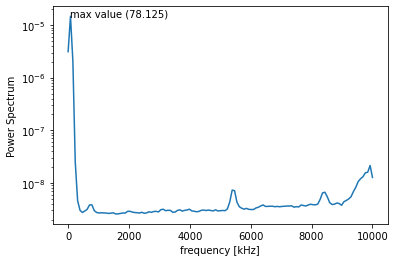


Velocity:  1.489863416
Max Frequency value:  156.25


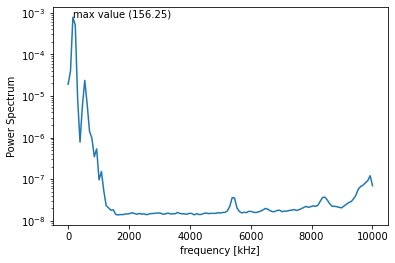


Velocity:  2.383839864
Max Frequency value:  312.5


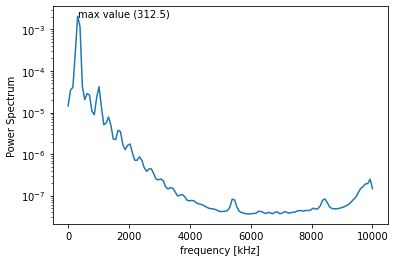


Velocity:  3.4078128679999997
Max Frequency value:  468.75


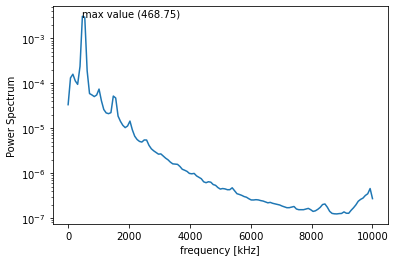


Velocity:  4.2009833720000005
Max Frequency value:  625.0


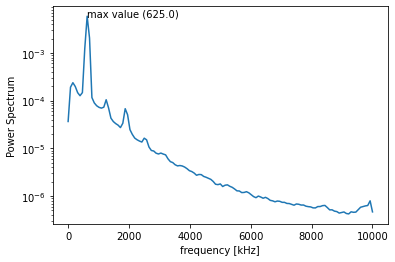


Velocity:  5.117683668
Max Frequency value:  781.25


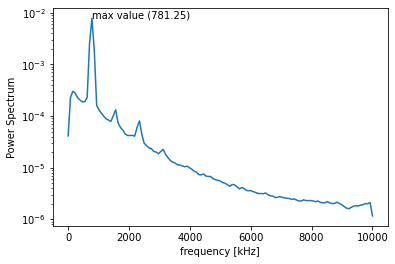


Velocity:  6.0828804000000005
Max Frequency value:  937.5


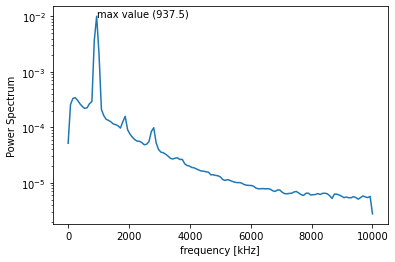


Velocity:  7.009955
Max Frequency value:  1093.75


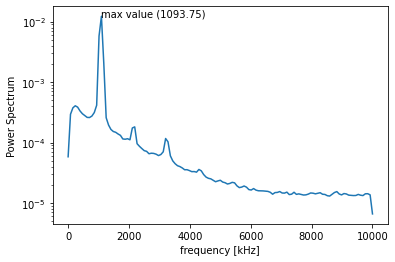


Velocity:  7.992843011999999
Max Frequency value:  1250.0


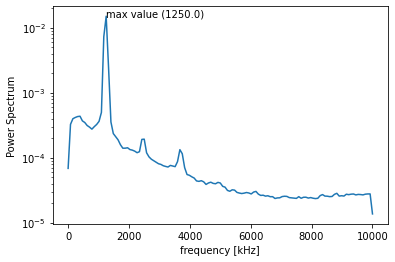


Velocity:  8.984112912
Max Frequency value:  1406.25


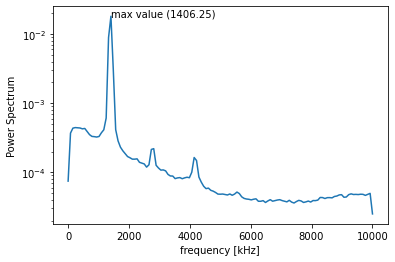


Velocity:  9.863172004
Max Frequency value:  1562.5


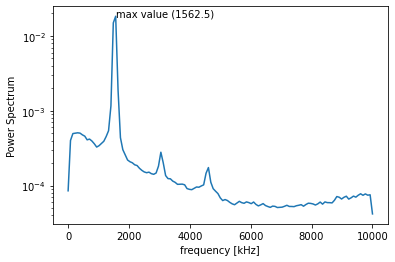


Velocity:  10.843543731999999
Max Frequency value:  1718.75


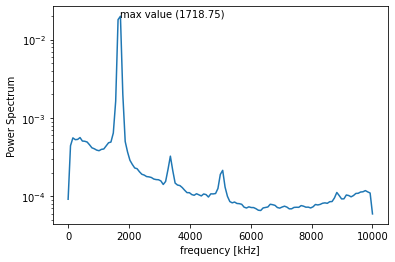


Velocity:  11.747224619999999
Max Frequency value:  1796.875


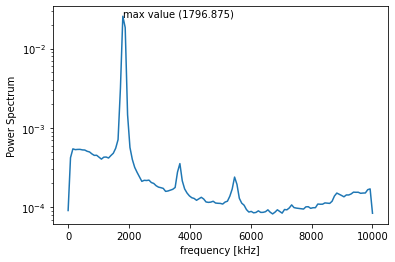


Velocity:  12.808031556000001
Max Frequency value:  1953.125


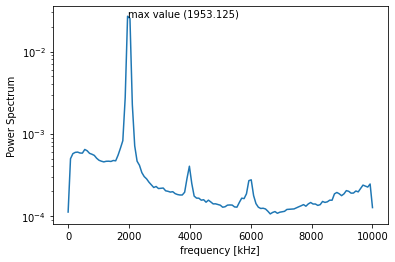


Velocity:  13.736789404
Max Frequency value:  2109.375


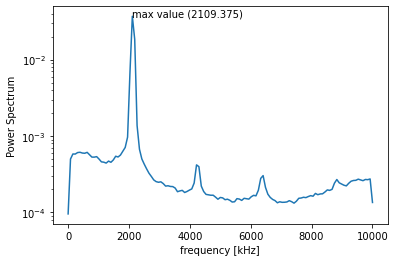


Velocity:  14.587559623999999
Max Frequency value:  2265.625


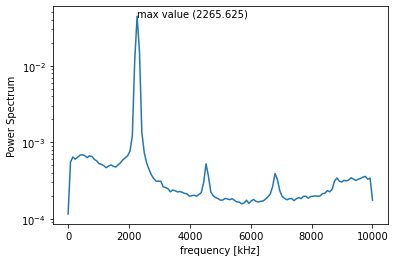

In [8]:
df = pd.read_csv(path_mat + dstream[-1], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 0*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

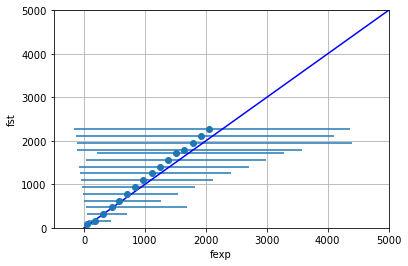

In [9]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')



## y-1

Velocity:  0.621444856
Max Frequency value:  78.125


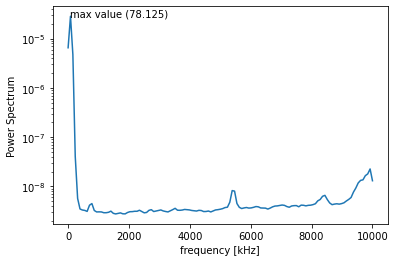


Velocity:  1.4073842639999998
Max Frequency value:  156.25


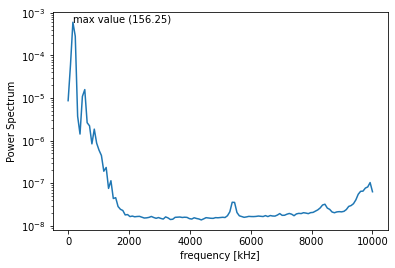


Velocity:  2.311872424
Max Frequency value:  312.5


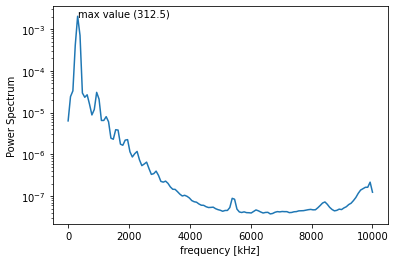


Velocity:  3.3061137720000002
Max Frequency value:  468.75


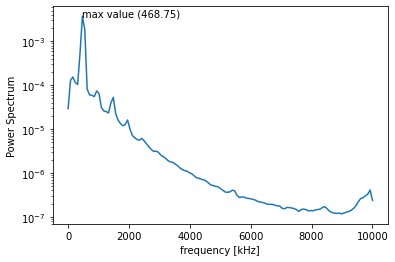


Velocity:  4.2164160079999995
Max Frequency value:  625.0


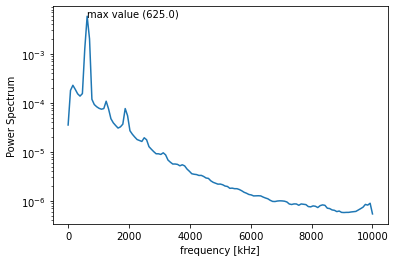


Velocity:  5.15906924
Max Frequency value:  781.25


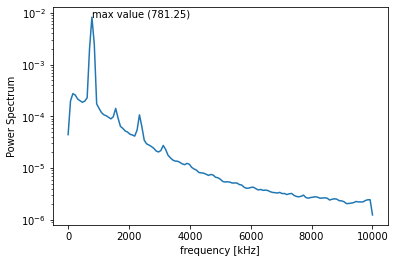


Velocity:  6.084486355999999
Max Frequency value:  937.5


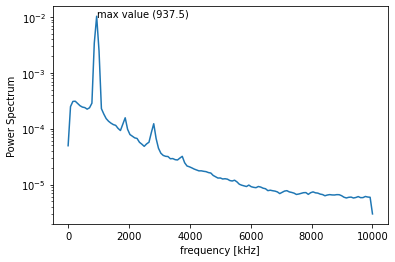


Velocity:  7.003668584
Max Frequency value:  1093.75


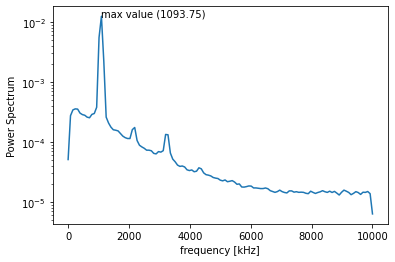


Velocity:  8.02059084
Max Frequency value:  1250.0


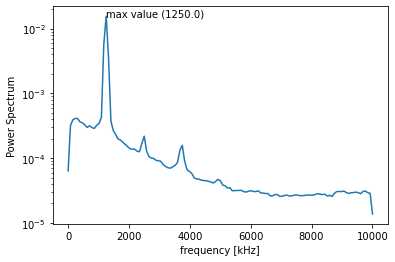


Velocity:  8.8883653
Max Frequency value:  1406.25


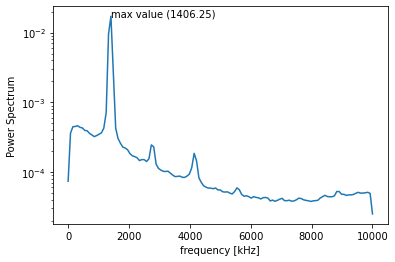


Velocity:  9.862854248
Max Frequency value:  1562.5


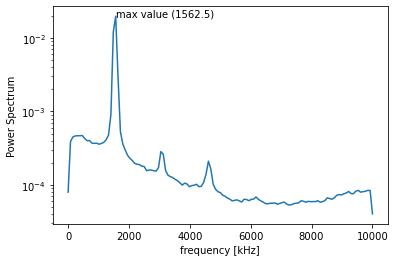


Velocity:  10.795004356
Max Frequency value:  1718.75


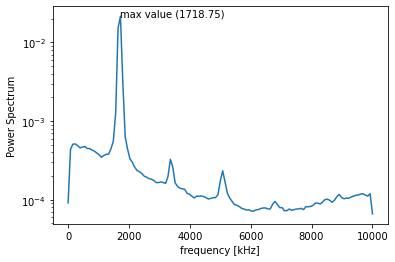


Velocity:  11.794278272
Max Frequency value:  1875.0


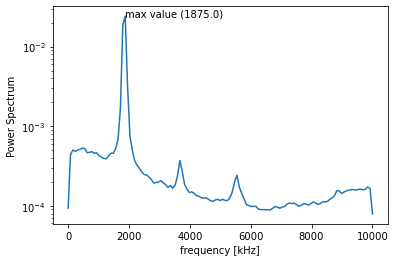


Velocity:  12.726531436000002
Max Frequency value:  1953.125


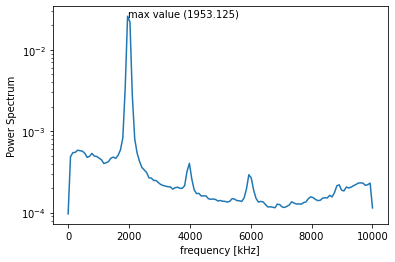


Velocity:  13.73023676
Max Frequency value:  2109.375


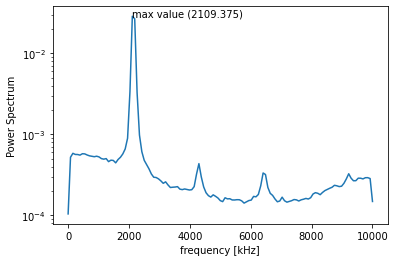


Velocity:  14.589715212
Max Frequency value:  2265.625


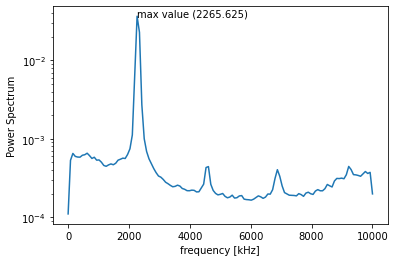

In [10]:
df1 = pd.read_csv(path_mat + dstream[-2], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 1*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df1[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

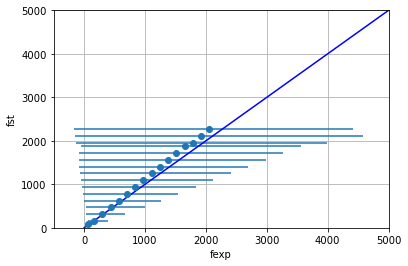

In [11]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

### Y0

Velocity:  0.57376428
Max Frequency value:  78.125


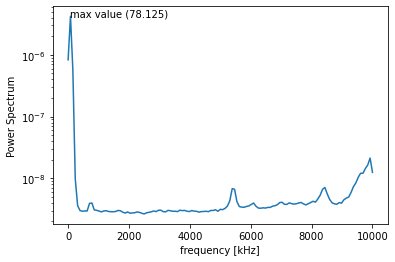


Velocity:  1.382779644
Max Frequency value:  156.25


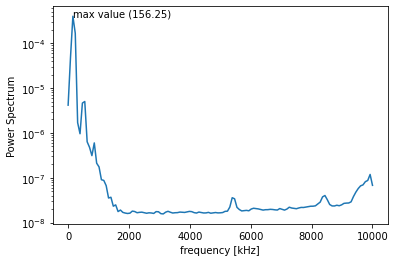


Velocity:  2.328069392
Max Frequency value:  312.5


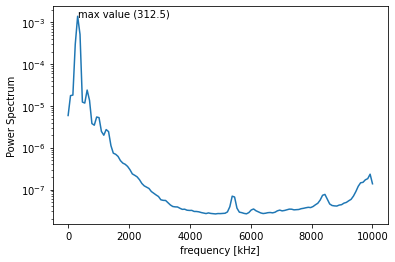


Velocity:  3.2445464
Max Frequency value:  468.75


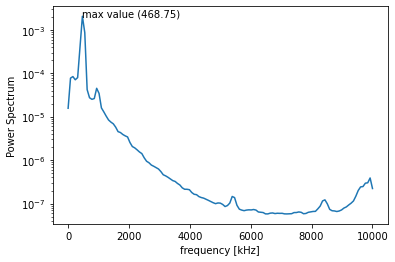


Velocity:  4.23663216
Max Frequency value:  625.0


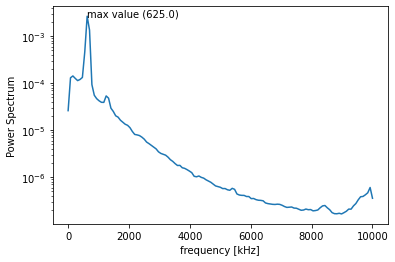


Velocity:  5.133468412
Max Frequency value:  781.25


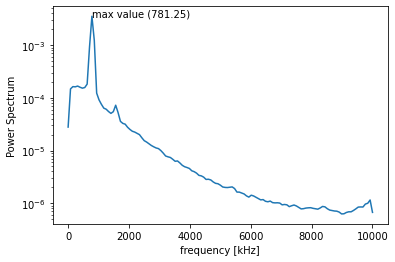


Velocity:  6.135885536
Max Frequency value:  937.5


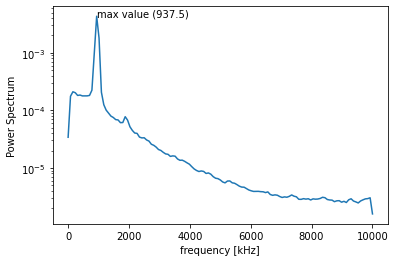


Velocity:  7.0313906479999995
Max Frequency value:  1093.75


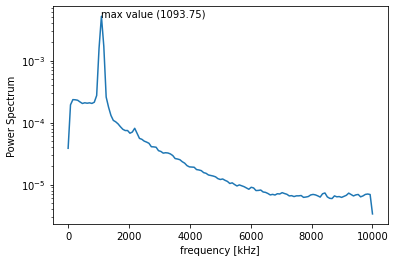


Velocity:  7.9577266799999995
Max Frequency value:  1250.0


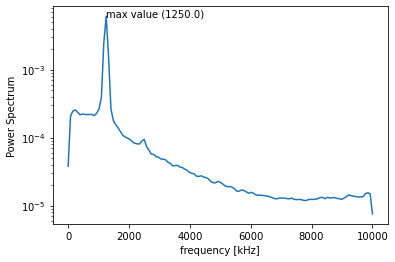


Velocity:  8.984284672
Max Frequency value:  1406.25


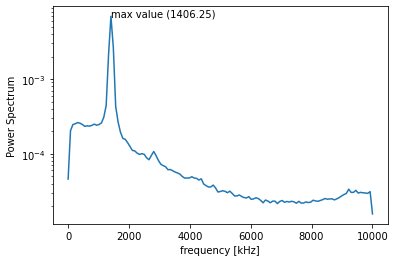


Velocity:  9.933516312
Max Frequency value:  1562.5


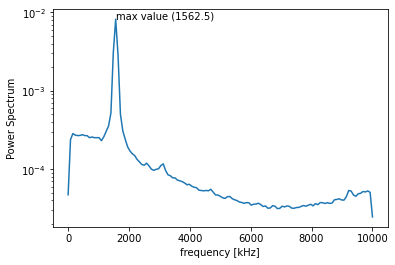


Velocity:  10.77871292
Max Frequency value:  1718.75


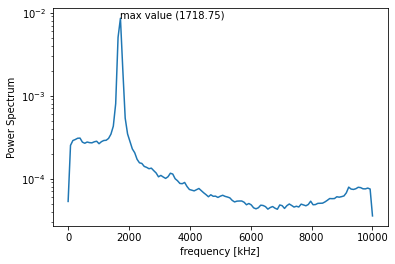


Velocity:  11.733234768
Max Frequency value:  1875.0


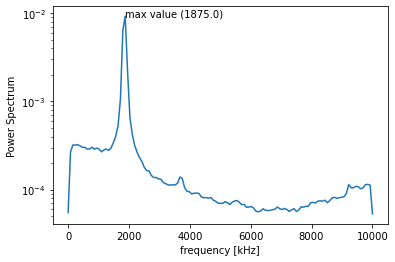


Velocity:  12.76211152
Max Frequency value:  2031.25


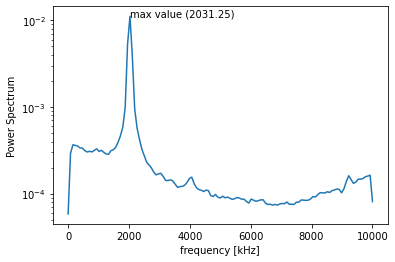


Velocity:  13.684643068000002
Max Frequency value:  2187.5


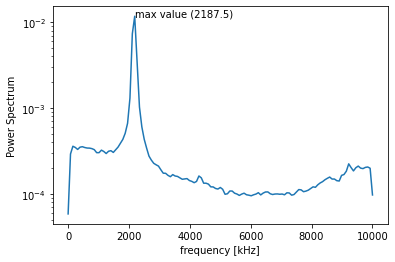


Velocity:  14.597392883999998
Max Frequency value:  2265.625


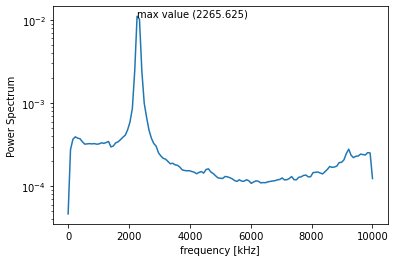

In [12]:
df2 = pd.read_csv(path_mat + dstream[1], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 2*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df2[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

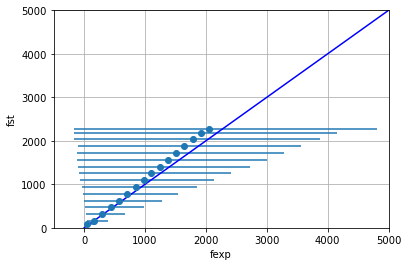

In [13]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

### Y1

Velocity:  0.59261494
Max Frequency value:  78.125


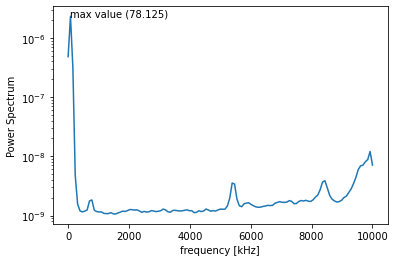


Velocity:  1.338448388
Max Frequency value:  156.25


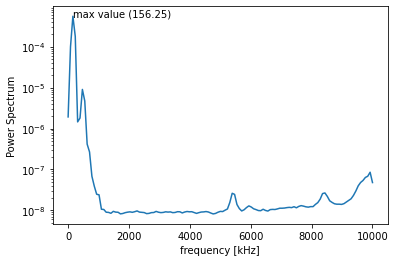


Velocity:  2.38329882
Max Frequency value:  312.5


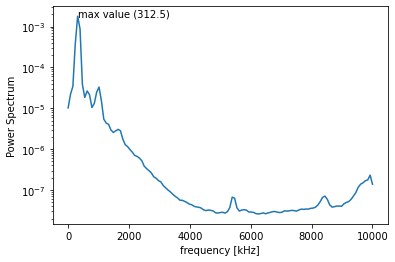


Velocity:  3.240218048
Max Frequency value:  468.75


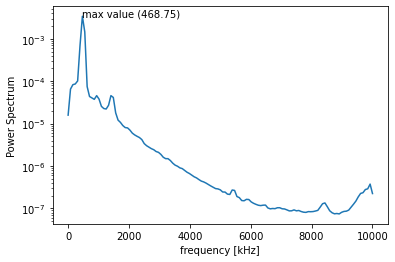


Velocity:  4.244120896
Max Frequency value:  625.0


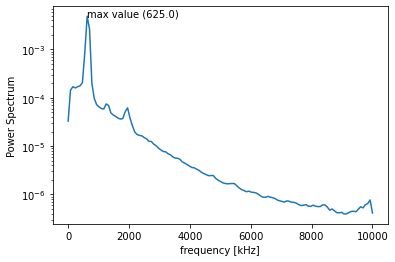


Velocity:  5.229937415999999
Max Frequency value:  781.25


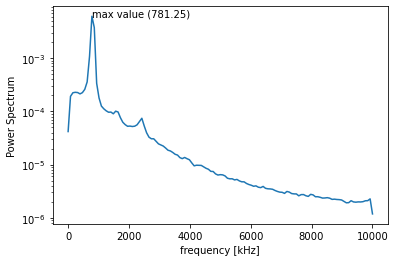


Velocity:  6.15982888
Max Frequency value:  937.5


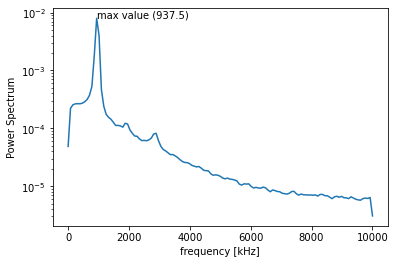


Velocity:  7.033915520000001
Max Frequency value:  1093.75


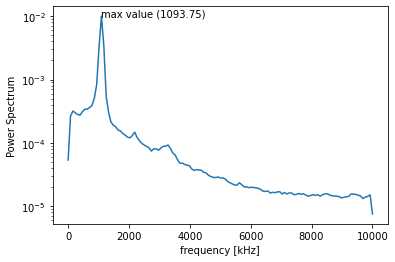


Velocity:  7.993298176000001
Max Frequency value:  1250.0


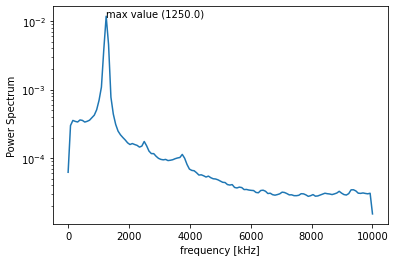


Velocity:  8.949657856
Max Frequency value:  1406.25


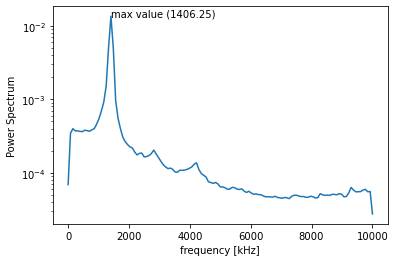


Velocity:  9.895892284
Max Frequency value:  1562.5


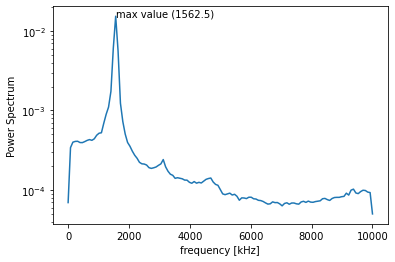


Velocity:  10.863029904
Max Frequency value:  1718.75


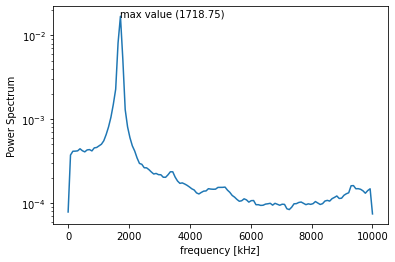


Velocity:  11.782418243999999
Max Frequency value:  1875.0


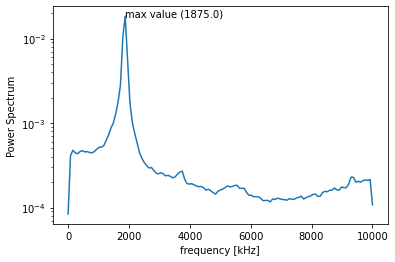


Velocity:  12.73158118
Max Frequency value:  2031.25


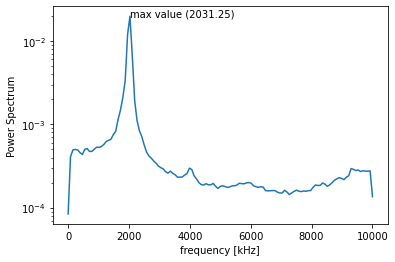


Velocity:  13.655615628
Max Frequency value:  2187.5


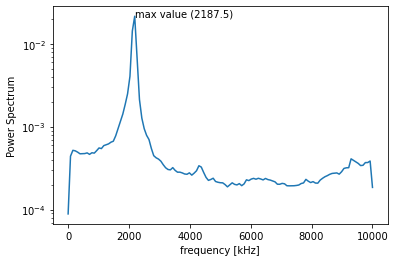


Velocity:  14.576549808
Max Frequency value:  2265.625


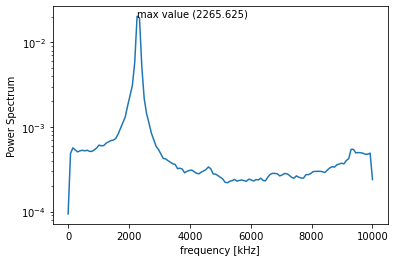

In [14]:
df3 = pd.read_csv(path_mat + dstream[2], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 3*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df3[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

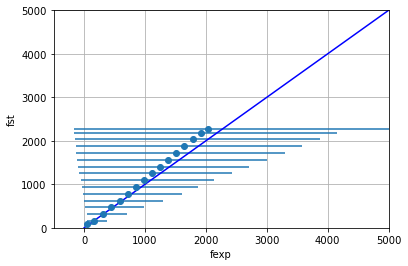

In [15]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y2

Velocity:  0.5491424840000001
Max Frequency value:  78.125


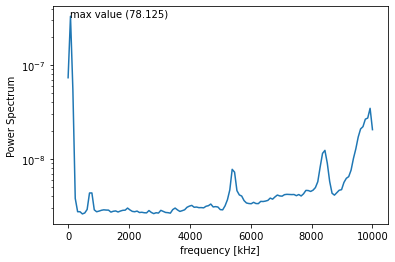


Velocity:  1.4713992160000002
Max Frequency value:  78.125


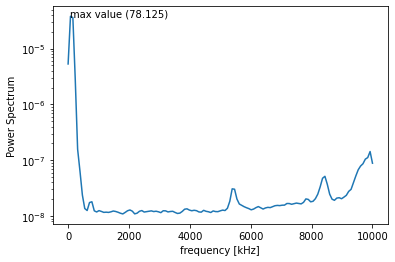


Velocity:  2.3517636840000002
Max Frequency value:  234.375


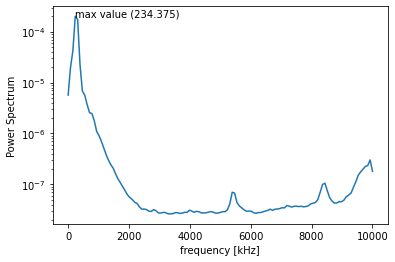


Velocity:  3.311841968
Max Frequency value:  390.625


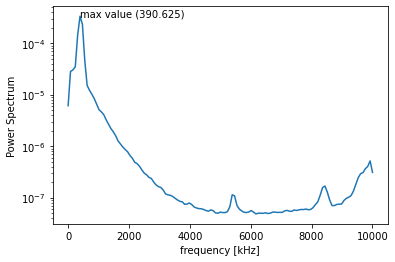


Velocity:  4.202262984
Max Frequency value:  546.875


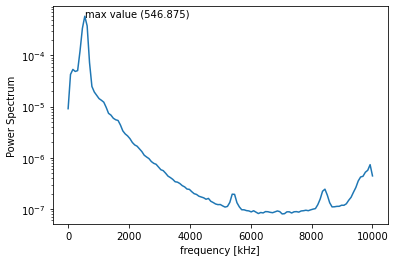


Velocity:  5.148317064
Max Frequency value:  703.125


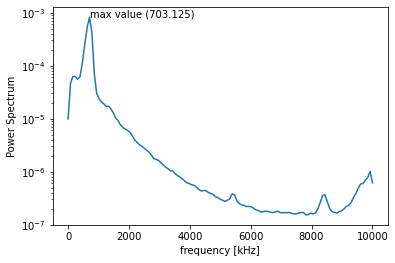


Velocity:  6.143923904
Max Frequency value:  859.375


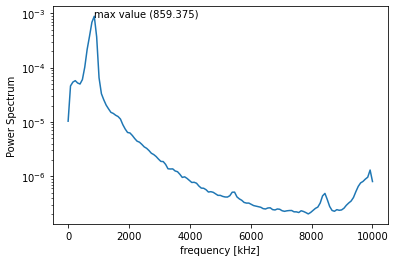


Velocity:  7.0647722040000005
Max Frequency value:  937.5


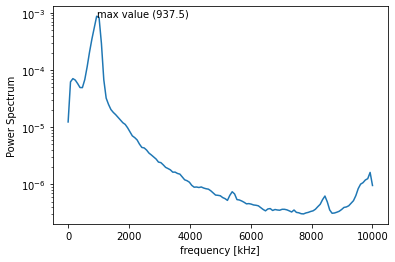


Velocity:  8.028088164
Max Frequency value:  1093.75


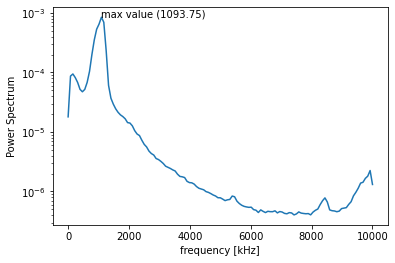


Velocity:  8.887987428
Max Frequency value:  1250.0


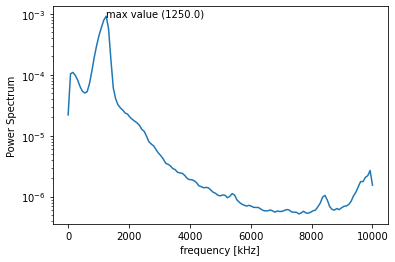


Velocity:  9.838721968
Max Frequency value:  1406.25


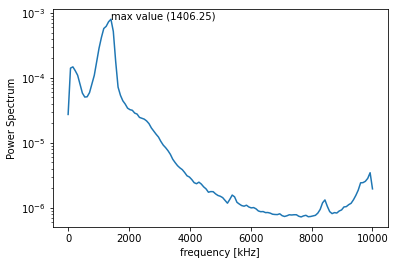


Velocity:  10.822434428000001
Max Frequency value:  1484.375


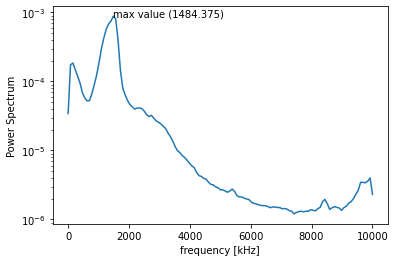


Velocity:  11.710330571999998
Max Frequency value:  1640.625


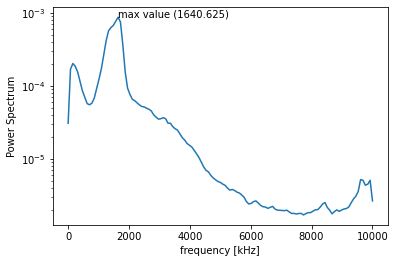


Velocity:  12.718020728
Max Frequency value:  1796.875


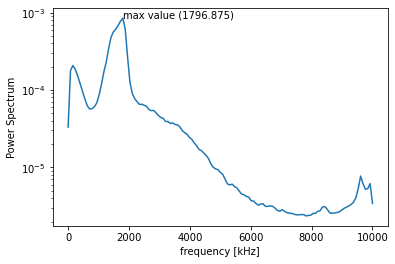


Velocity:  13.658801776
Max Frequency value:  1875.0


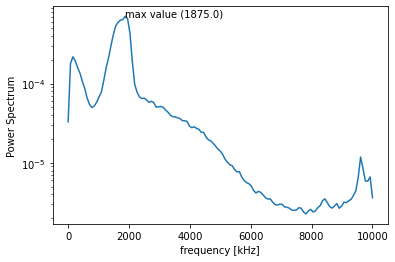


Velocity:  14.550339232
Max Frequency value:  2031.25


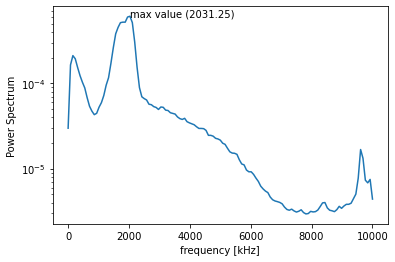

In [16]:
df4 = pd.read_csv(path_mat + dstream[3], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 4*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df4[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

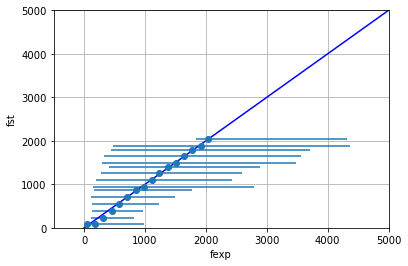

In [17]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y3

Velocity:  0.572828188
Max Frequency value:  78.125


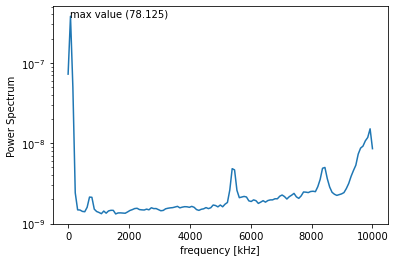


Velocity:  1.3728089760000002
Max Frequency value:  156.25


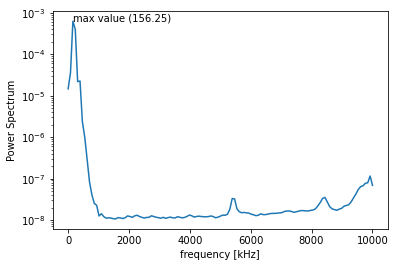


Velocity:  2.364602744
Max Frequency value:  312.5


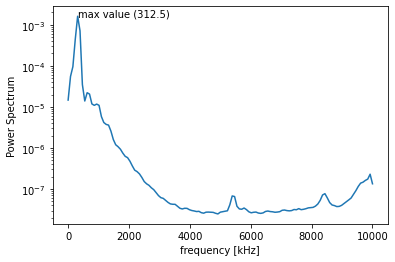


Velocity:  3.2912565320000002
Max Frequency value:  468.75


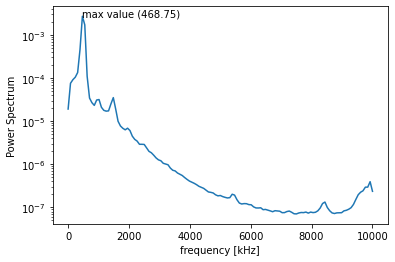


Velocity:  4.215540032
Max Frequency value:  625.0


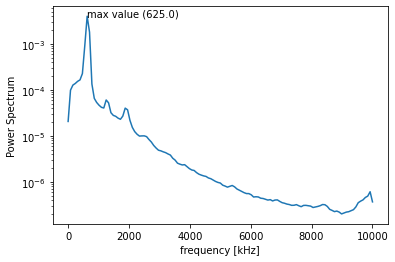


Velocity:  5.13772806
Max Frequency value:  781.25


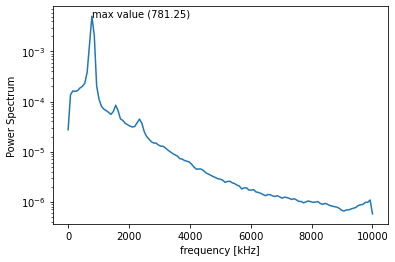


Velocity:  6.17644666
Max Frequency value:  937.5


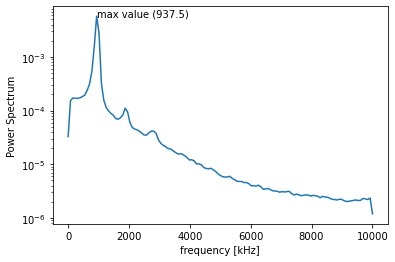


Velocity:  7.082214432
Max Frequency value:  1093.75


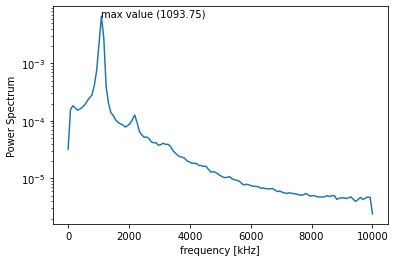


Velocity:  8.044791824
Max Frequency value:  1250.0


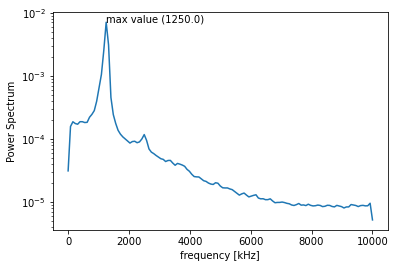


Velocity:  8.939644248
Max Frequency value:  1406.25


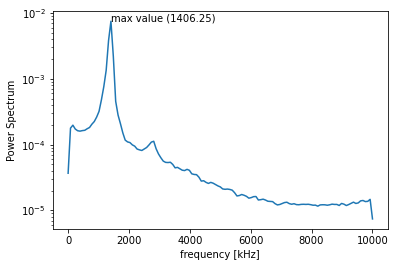


Velocity:  9.932425636
Max Frequency value:  1562.5


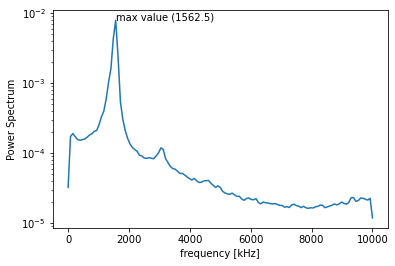


Velocity:  10.866130172
Max Frequency value:  1718.75


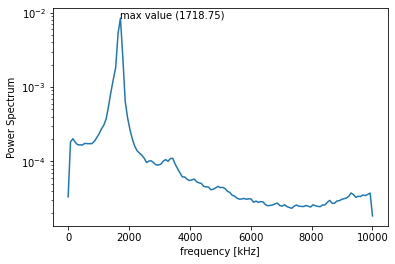


Velocity:  11.77358978
Max Frequency value:  1875.0


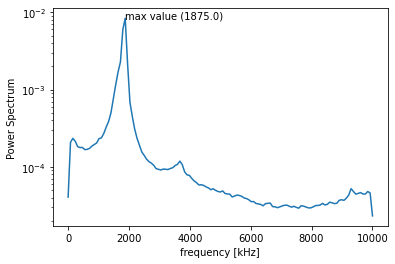


Velocity:  12.70281138
Max Frequency value:  2031.25


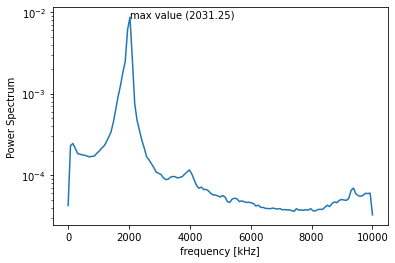


Velocity:  13.675110388
Max Frequency value:  2187.5


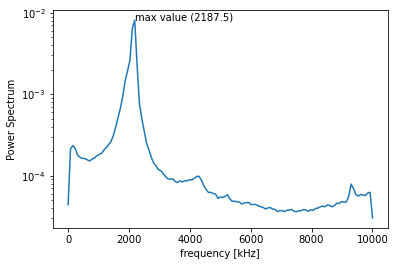


Velocity:  14.667101680000002
Max Frequency value:  2265.625


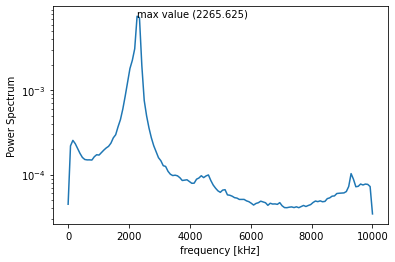

In [18]:
df5 = pd.read_csv(path_mat + dstream[4], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 5*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df5[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    else:
        Fst.append(1000)
        
    counter += 1

Text(0, 0.5, 'fst')

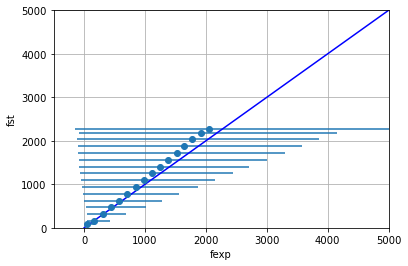

In [19]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y4

Velocity:  0.62881336
Max Frequency value:  78.125


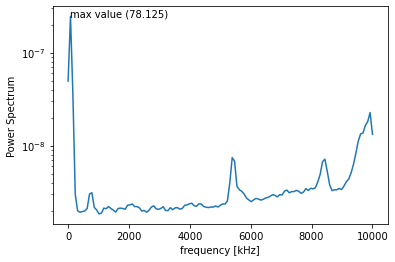


Velocity:  1.403931888
Max Frequency value:  156.25


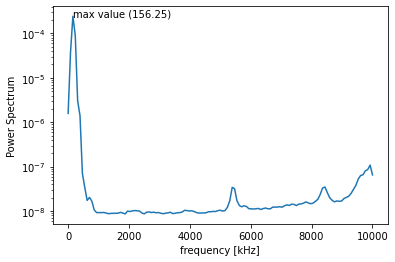


Velocity:  2.366921504
Max Frequency value:  312.5


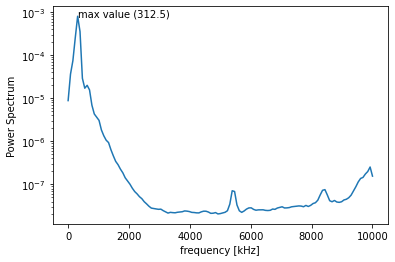


Velocity:  3.2518290240000005
Max Frequency value:  468.75


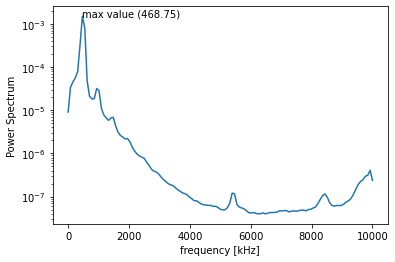


Velocity:  4.185688144
Max Frequency value:  625.0


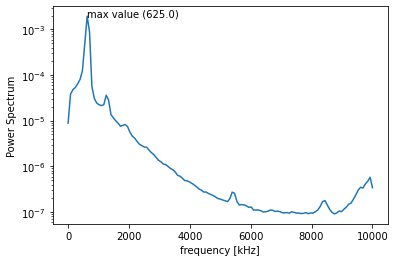


Velocity:  5.119289624
Max Frequency value:  781.25


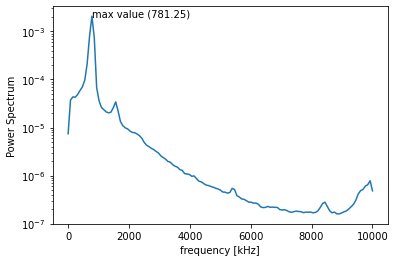


Velocity:  6.143228276
Max Frequency value:  937.5


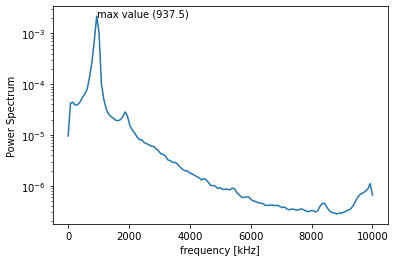


Velocity:  7.033391651999999
Max Frequency value:  1093.75


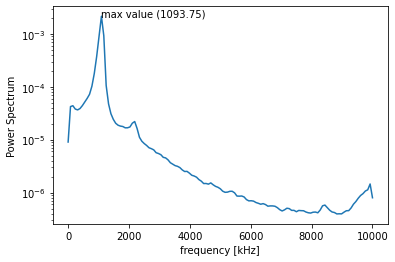


Velocity:  8.04691306
Max Frequency value:  1250.0


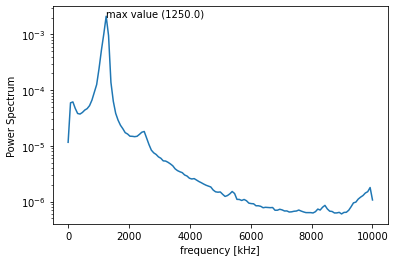


Velocity:  8.928454084
Max Frequency value:  1406.25


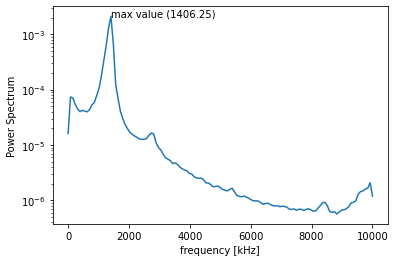


Velocity:  9.972866528
Max Frequency value:  1562.5


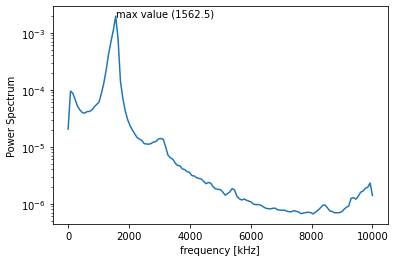


Velocity:  10.859388592
Max Frequency value:  78.125


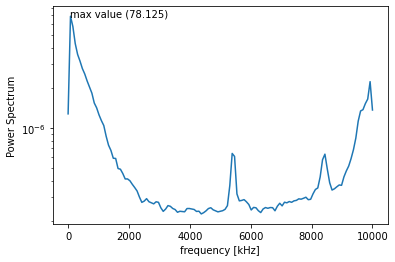


Velocity:  11.78685824
Max Frequency value:  1875.0


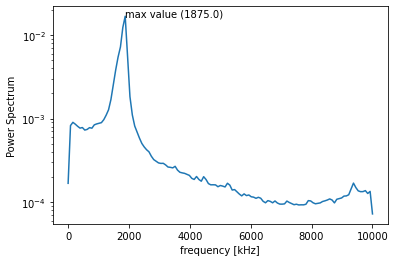


Velocity:  12.744995636000002
Max Frequency value:  2031.25


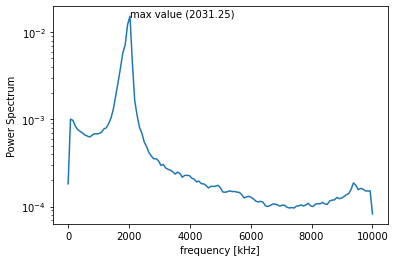


Velocity:  13.595559744
Max Frequency value:  2187.5


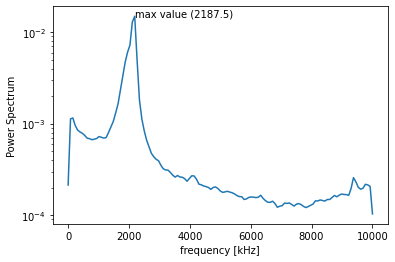


Velocity:  14.61359844
Max Frequency value:  2343.75


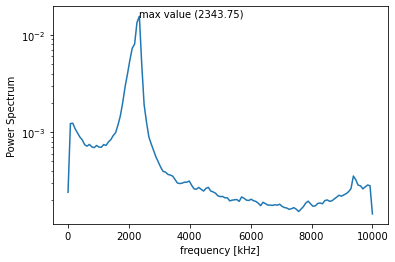

In [20]:
df6 = pd.read_csv(path_mat + dstream[5], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 6*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df6[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

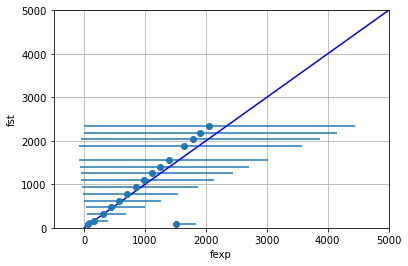

In [21]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y5

Velocity:  0.591464148
Max Frequency value:  78.125


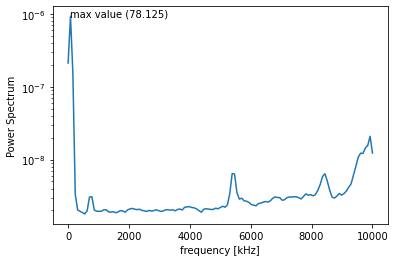


Velocity:  1.476002384
Max Frequency value:  156.25


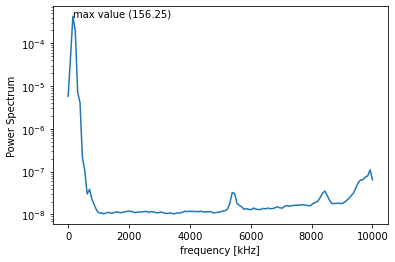


Velocity:  2.322470016
Max Frequency value:  312.5


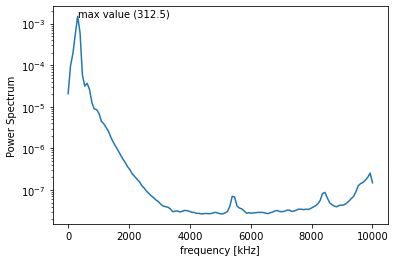


Velocity:  3.3435918040000003
Max Frequency value:  468.75


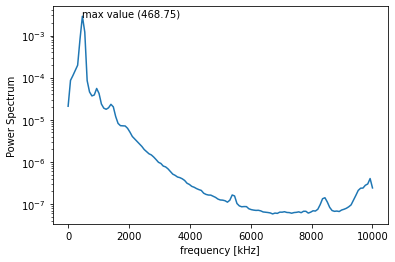


Velocity:  4.170178216
Max Frequency value:  625.0


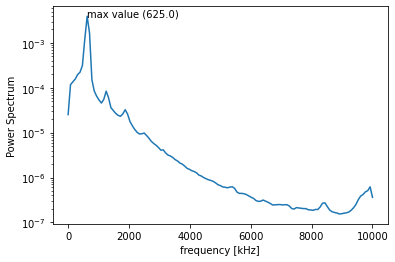


Velocity:  5.224458272000001
Max Frequency value:  781.25


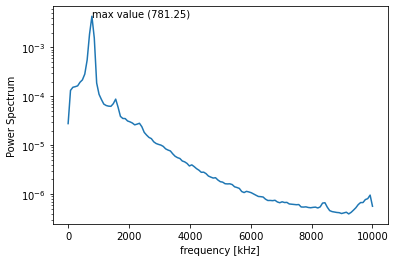


Velocity:  6.130895908000001
Max Frequency value:  937.5


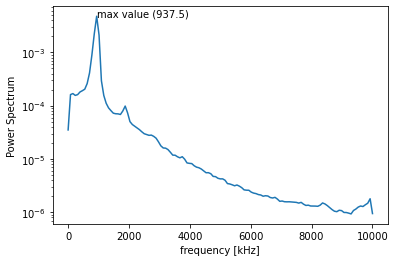


Velocity:  7.038699036
Max Frequency value:  1093.75


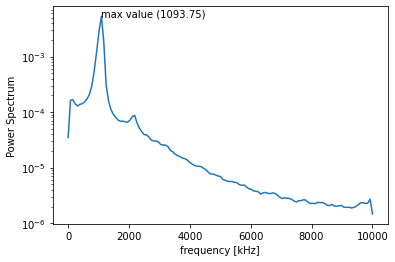


Velocity:  8.016417072
Max Frequency value:  1250.0


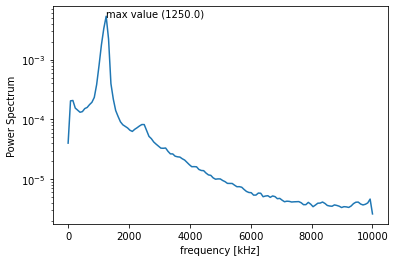


Velocity:  8.917160864000001
Max Frequency value:  1406.25


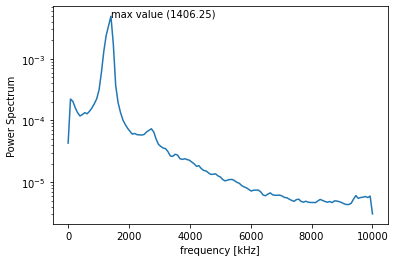


Velocity:  9.898889496
Max Frequency value:  1562.5


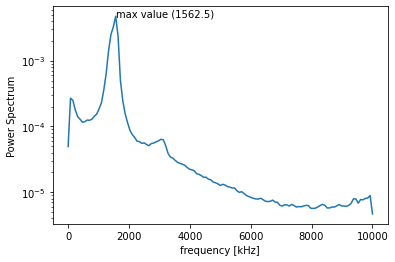


Velocity:  10.844557116
Max Frequency value:  1718.75


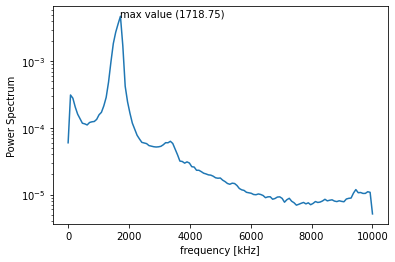


Velocity:  11.790928952
Max Frequency value:  1875.0


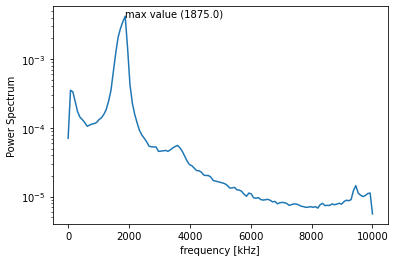


Velocity:  12.744514708
Max Frequency value:  2031.25


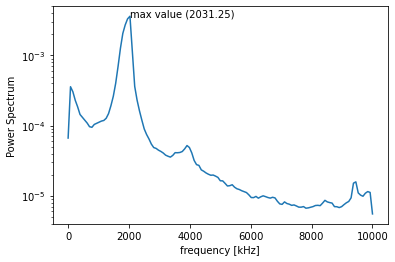


Velocity:  13.629911744
Max Frequency value:  2109.375


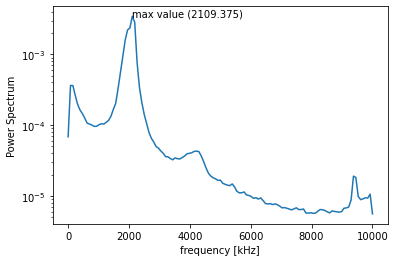


Velocity:  14.636390991999999
Max Frequency value:  2265.625


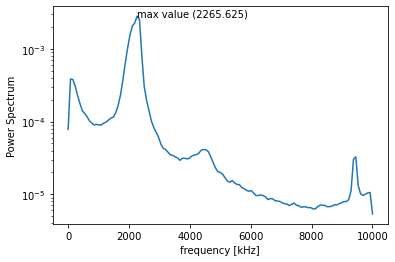

In [22]:
df7 = pd.read_csv(path_mat + dstream[6], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 7*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df7[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

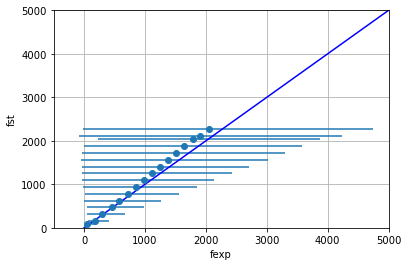

In [23]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y6

Velocity:  0.627920208
Max Frequency value:  78.125


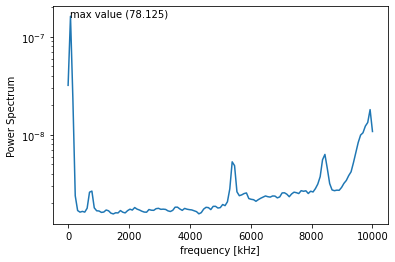


Velocity:  1.4244572079999998
Max Frequency value:  156.25


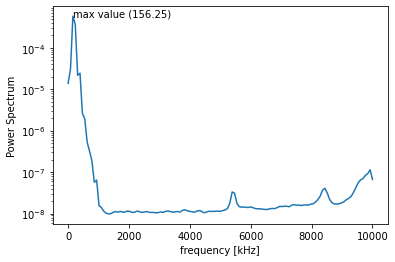


Velocity:  2.35221026
Max Frequency value:  312.5


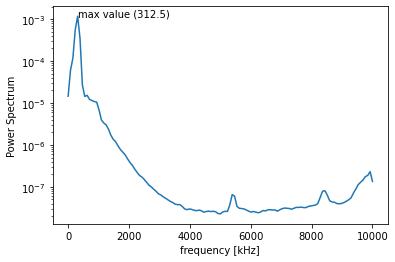


Velocity:  3.3229977799999997
Max Frequency value:  468.75


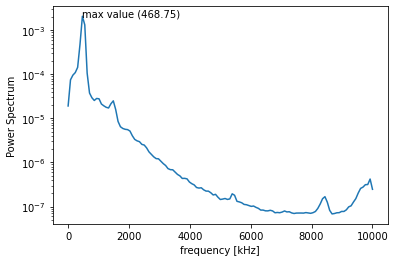


Velocity:  4.2357475959999995
Max Frequency value:  625.0


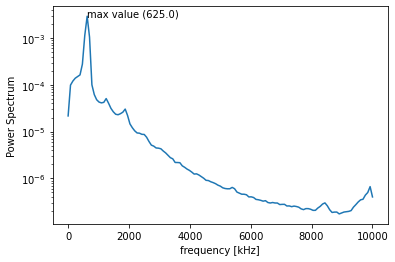


Velocity:  5.2195802879999995
Max Frequency value:  781.25


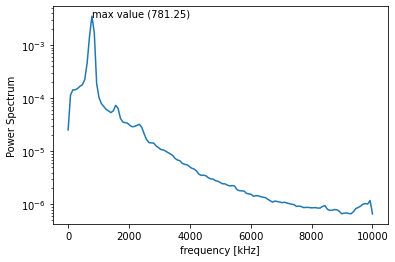


Velocity:  6.126275564
Max Frequency value:  937.5


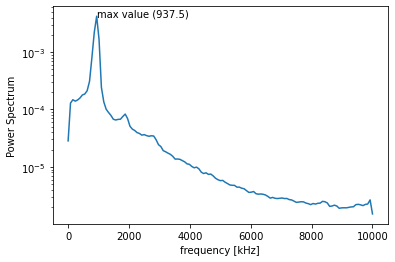


Velocity:  7.0574809919999995
Max Frequency value:  1093.75


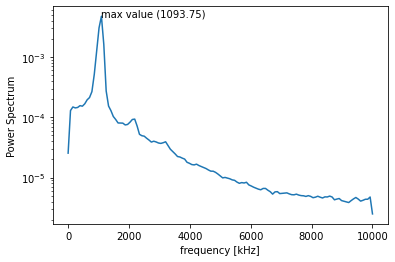


Velocity:  8.012251892
Max Frequency value:  1250.0


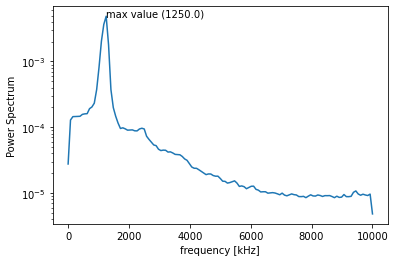


Velocity:  8.967220316
Max Frequency value:  1406.25


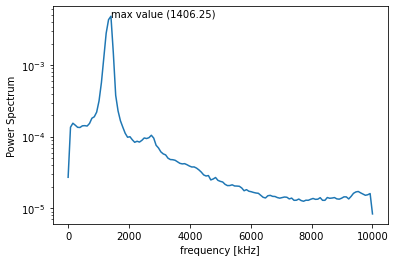


Velocity:  9.816272936
Max Frequency value:  1562.5


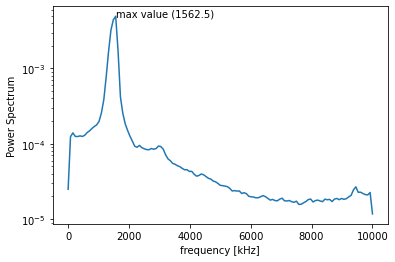


Velocity:  10.875568384000001
Max Frequency value:  1640.625


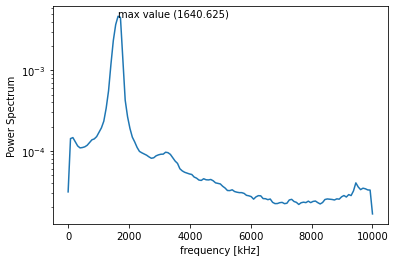


Velocity:  11.752497651999999
Max Frequency value:  1875.0


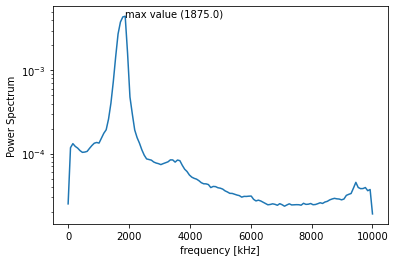


Velocity:  12.716826996000002
Max Frequency value:  1953.125


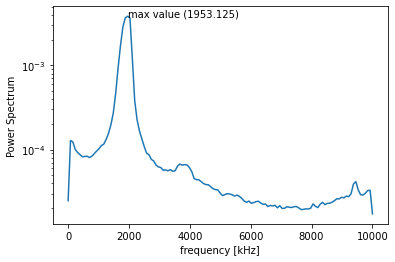


Velocity:  13.66088866
Max Frequency value:  2109.375


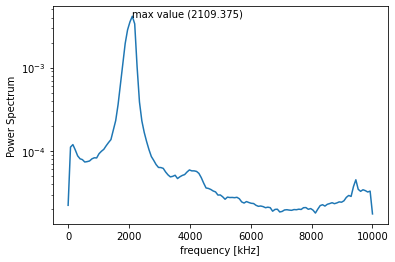


Velocity:  14.688064988
Max Frequency value:  2265.625


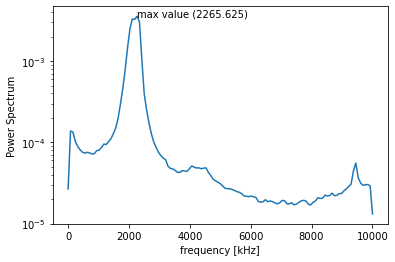

In [24]:
df8 = pd.read_csv(path_mat + dstream[7], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 8*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df8[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

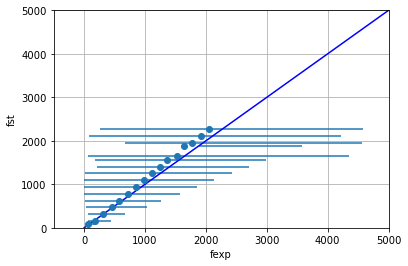

In [25]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y7

Velocity:  0.565923436
Max Frequency value:  78.125


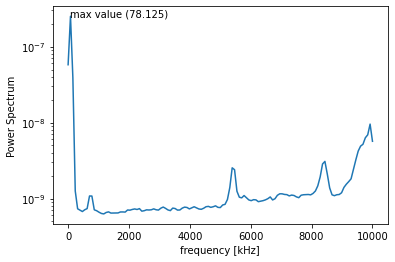


Velocity:  1.4502813239999999
Max Frequency value:  156.25


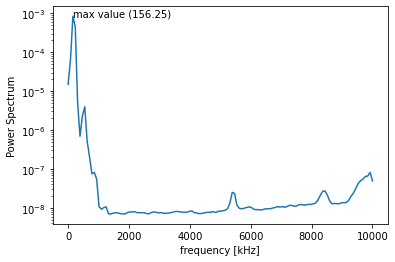


Velocity:  2.3210787600000002
Max Frequency value:  312.5


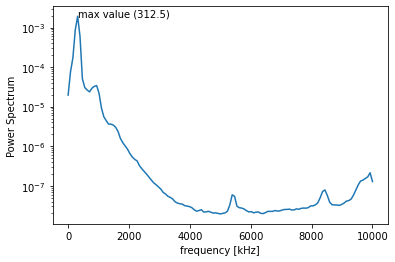


Velocity:  3.334170768
Max Frequency value:  468.75


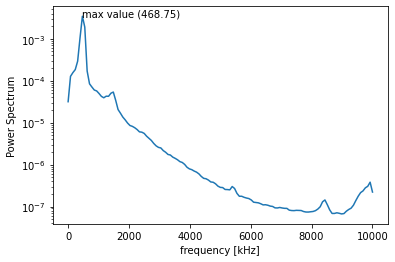


Velocity:  4.2512403480000005
Max Frequency value:  625.0


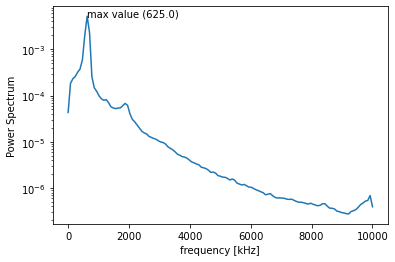


Velocity:  5.126228728
Max Frequency value:  781.25


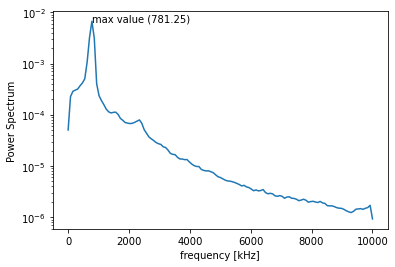


Velocity:  6.11160726
Max Frequency value:  937.5


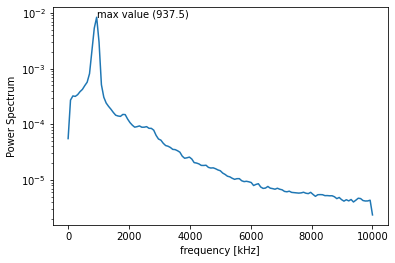


Velocity:  7.078513004
Max Frequency value:  1093.75


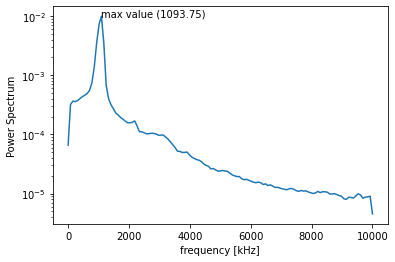


Velocity:  7.98057076
Max Frequency value:  1250.0


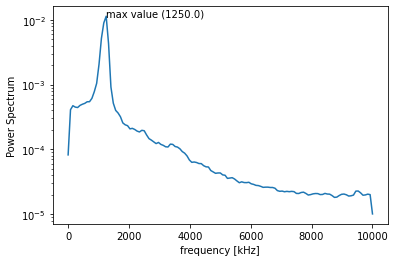


Velocity:  8.994092168
Max Frequency value:  1406.25


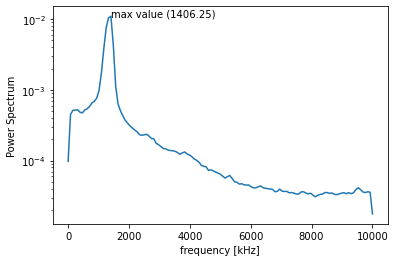


Velocity:  9.915043524
Max Frequency value:  1484.375


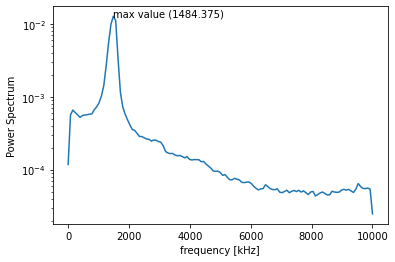


Velocity:  10.880661068
Max Frequency value:  1640.625


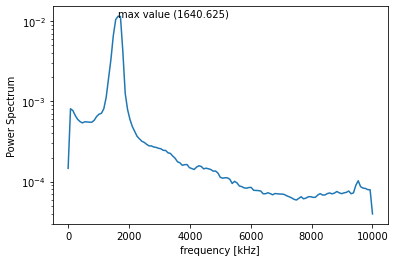


Velocity:  11.69543898
Max Frequency value:  1796.875


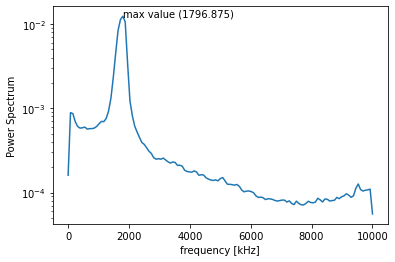


Velocity:  12.749341163999999
Max Frequency value:  1953.125


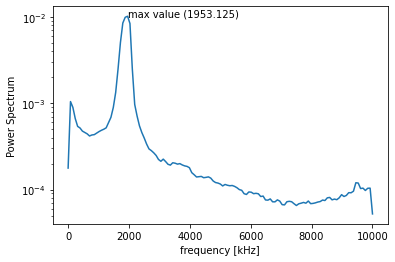


Velocity:  13.634325976000001
Max Frequency value:  2031.25


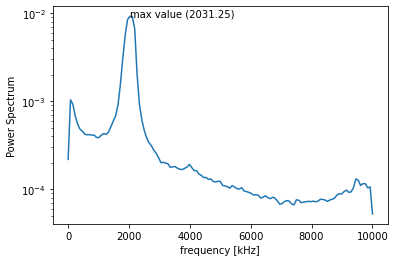


Velocity:  14.70733646
Max Frequency value:  2187.5


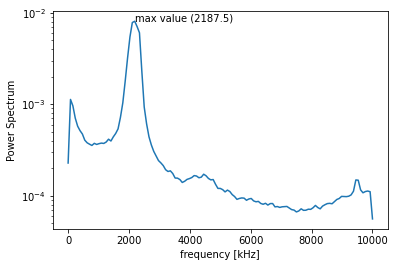

In [26]:
df9 = pd.read_csv(path_mat + dstream[8], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 9*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df9[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

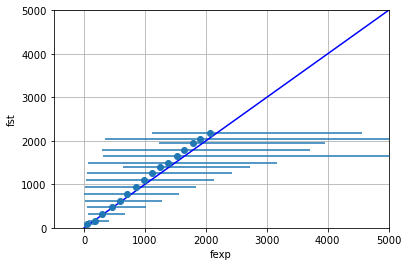

In [27]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y8

Velocity:  0.721022716
Max Frequency value:  78.125


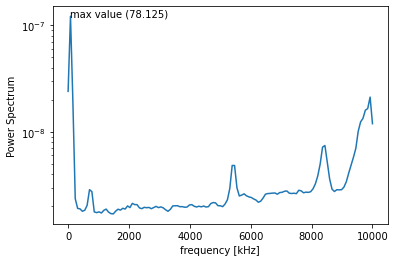


Velocity:  1.4367638120000001
Max Frequency value:  156.25


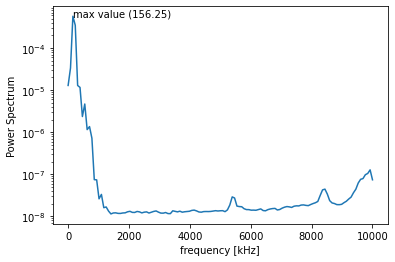


Velocity:  2.305817884
Max Frequency value:  312.5


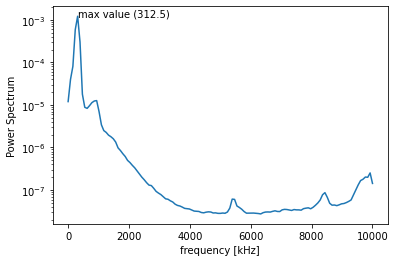


Velocity:  3.23497078
Max Frequency value:  468.75


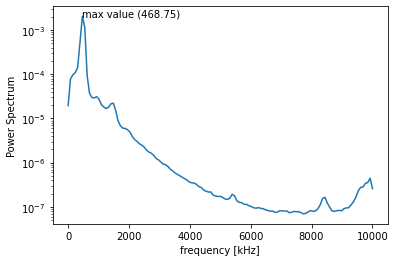


Velocity:  4.257337828
Max Frequency value:  625.0


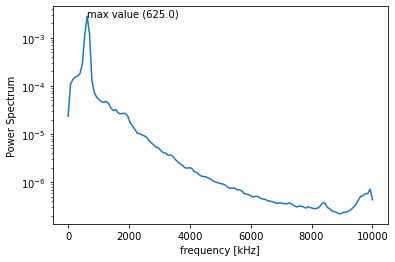


Velocity:  5.1958859959999995
Max Frequency value:  781.25


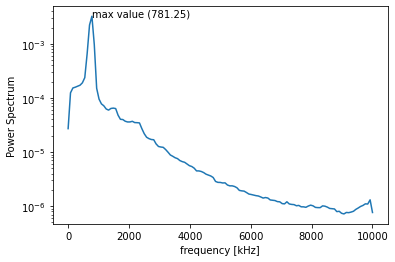


Velocity:  6.087835675999999
Max Frequency value:  937.5


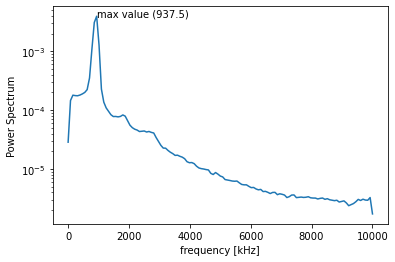


Velocity:  7.0106592160000005
Max Frequency value:  1093.75


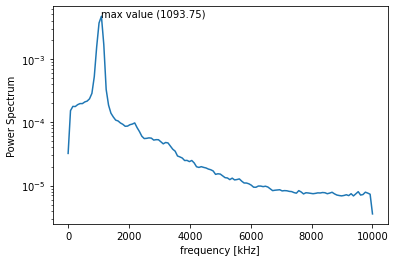


Velocity:  8.00676416
Max Frequency value:  1250.0


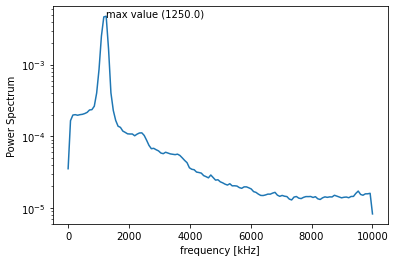


Velocity:  8.928239384000001
Max Frequency value:  1328.125


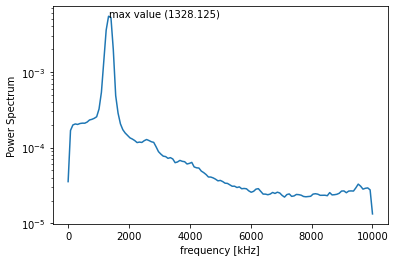


Velocity:  9.82883718
Max Frequency value:  1484.375


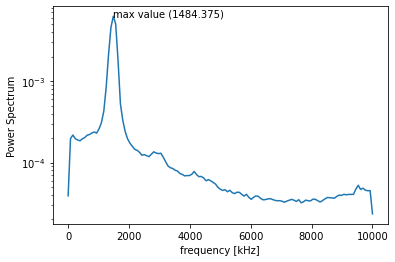


Velocity:  10.777270136
Max Frequency value:  1640.625


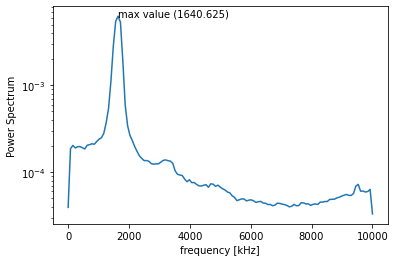


Velocity:  11.763799460000001
Max Frequency value:  1718.75


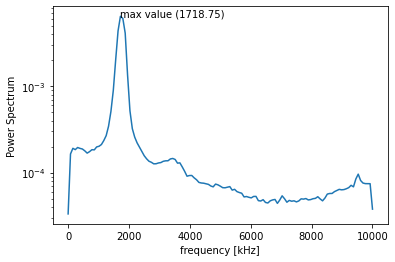


Velocity:  12.729726172
Max Frequency value:  1875.0


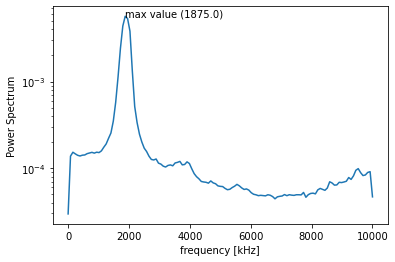


Velocity:  13.672104588000002
Max Frequency value:  2031.25


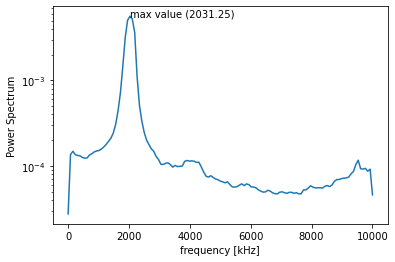


Velocity:  14.694832331999999
Max Frequency value:  2187.5


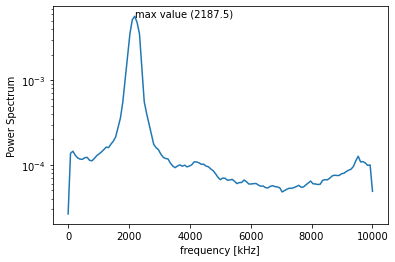

In [28]:
df10 = pd.read_csv(path_mat + dstream[9], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 10*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df10[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

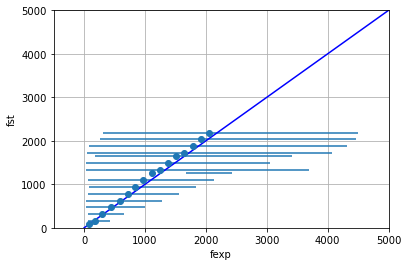

In [29]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y9

Velocity:  0.63920484
Max Frequency value:  78.125


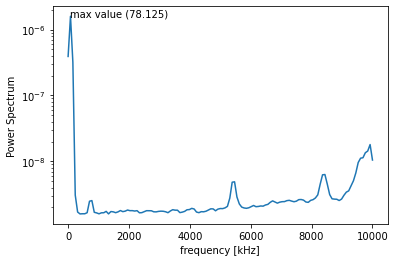


Velocity:  1.421511524
Max Frequency value:  156.25


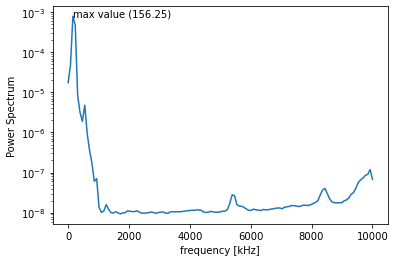


Velocity:  2.36058356
Max Frequency value:  312.5


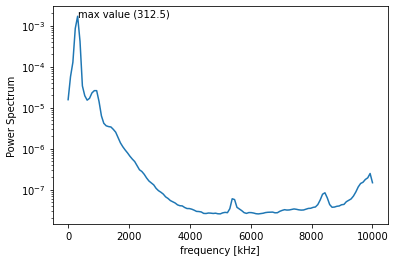


Velocity:  3.35142406
Max Frequency value:  468.75


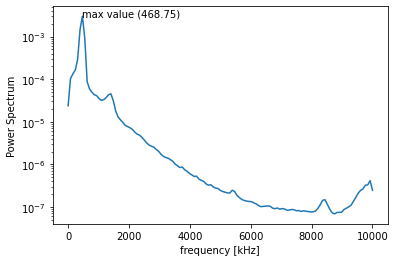


Velocity:  4.2217319799999995
Max Frequency value:  625.0


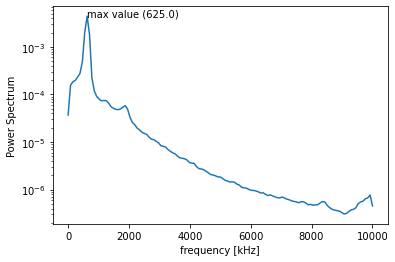


Velocity:  5.170267992
Max Frequency value:  781.25


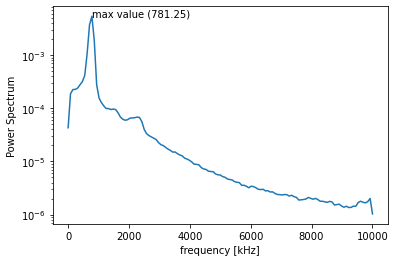


Velocity:  6.094534316
Max Frequency value:  937.5


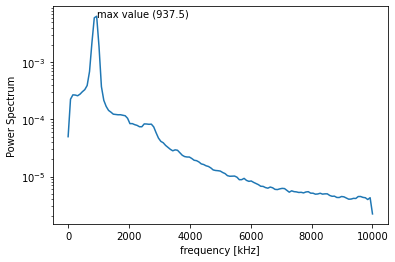


Velocity:  7.11112164
Max Frequency value:  1015.625


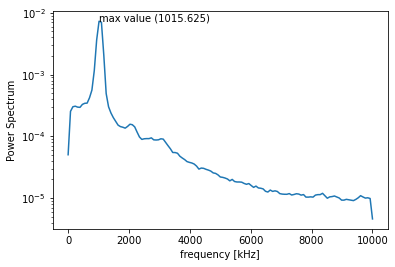


Velocity:  8.0048748
Max Frequency value:  1171.875


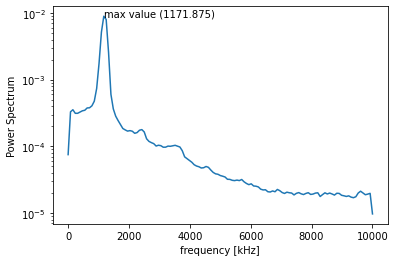


Velocity:  8.92404844
Max Frequency value:  1328.125


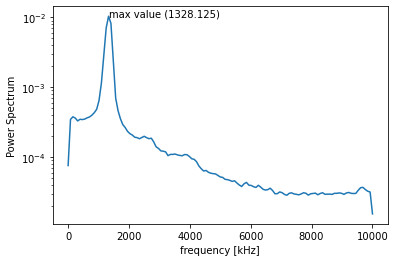


Velocity:  9.870437452000001
Max Frequency value:  1484.375


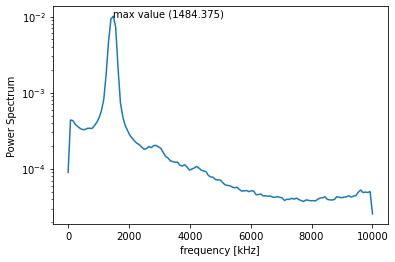


Velocity:  10.809664072
Max Frequency value:  1562.5


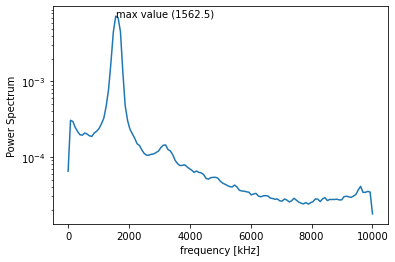


Velocity:  11.75594144
Max Frequency value:  1718.75


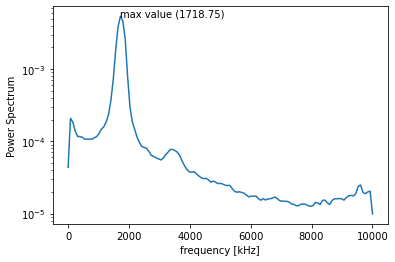


Velocity:  12.750491956000001
Max Frequency value:  1875.0


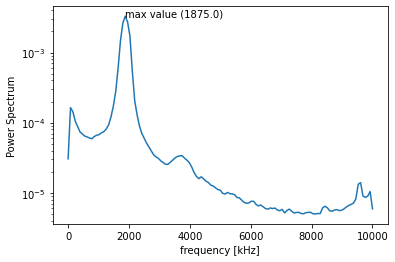


Velocity:  13.627206523999998
Max Frequency value:  2031.25


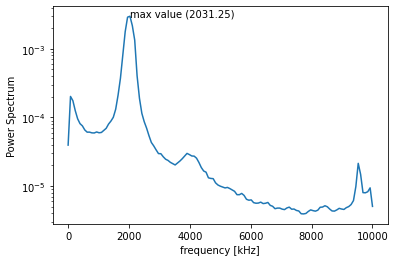


Velocity:  14.622907832
Max Frequency value:  2187.5


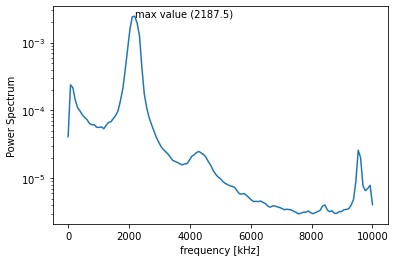

In [30]:
df11 = pd.read_csv(path_mat + dstream[10], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 11*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df11[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

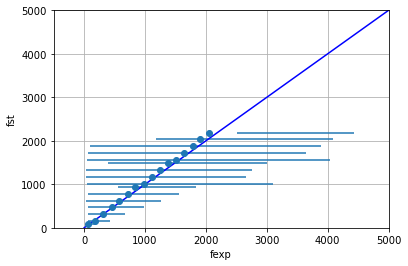

In [31]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

#### Velocidades UpStream

In [32]:
velocity = pd.read_csv(path_mat + ustream[0])
velocity.head()

PVDF peak  mA  PVDF peak V  PVDF peak power  n/a  Solar mA 1  Solar V 1  \
0        0.00007          0.0              0.0  0.0         inf    0.00130   
1        0.00007          0.0              0.0  0.0         inf    0.00131   
2        0.00007          0.0              0.0  0.0         inf    0.00130   
3        0.00007          0.0              0.0  0.0         inf    0.00131   
4        0.00007          0.0              0.0  0.0         inf    0.00131   

   solar mW 1  tunnel P  tunnel V      Patm  Tatm  num of 470k  Solar mA 2  \
0         inf   0.35641   0.77189  100658.0  20.0          0.0         inf   
1         inf   1.61581   1.64351  100658.0  20.0          0.0         inf   
2         inf   4.61547   2.77770  100658.0  20.0          0.0         inf   
3         inf   8.92867   3.86340  100658.0  20.0          0.0         inf   
4         inf  14.47269   4.91871  100658.0  20.0          0.0         inf   

   Solar V 2  Solar mW 2  
0    0.00132         inf  
1    0.00134         inf  
2    0.00132         inf  
3    0.00134         inf  
4    0.00134         inf

In [33]:
vel = pd.DataFrame(velocity.iloc[:,8]*0.8588)
vel.describe()

tunnel V
count  208.000000
mean     7.547611
std      4.339244
min      0.650197
25%      3.912908
50%      7.496886
75%     11.096825
max     14.732860

In [34]:
df_prueba = pd.read_csv(path_mat + ustream[1])
df_prueba.describe()

0.64386
count  1.599999e+06
mean   8.191902e+00
std    4.897543e+00
min    5.033300e-01
25%    3.861120e+00
50%    8.115420e+00
75%    1.238414e+01
max    2.062155e+01

## Graficas Upstream

## y-2

Velocity:  0.662899132
Max Frequency value:  78.125


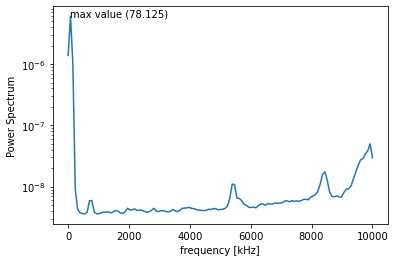


Velocity:  1.4114463879999999
Max Frequency value:  156.25


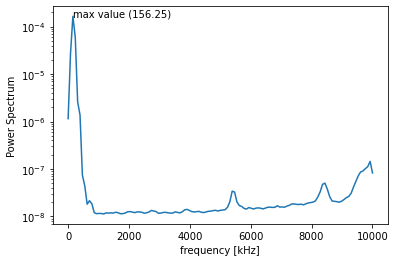


Velocity:  2.38548876
Max Frequency value:  312.5


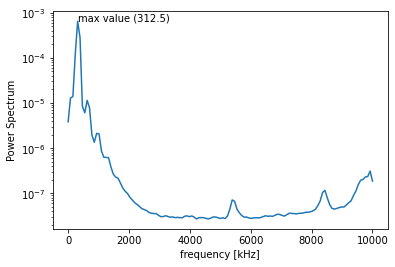


Velocity:  3.31788792
Max Frequency value:  468.75


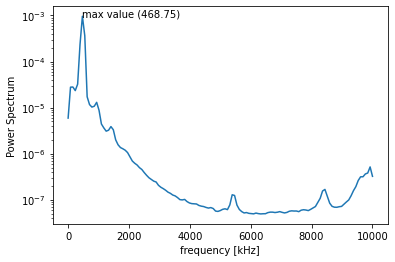


Velocity:  4.224188148
Max Frequency value:  625.0


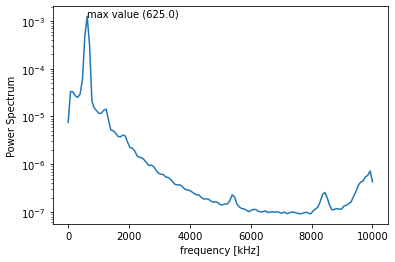


Velocity:  5.1618174
Max Frequency value:  781.25


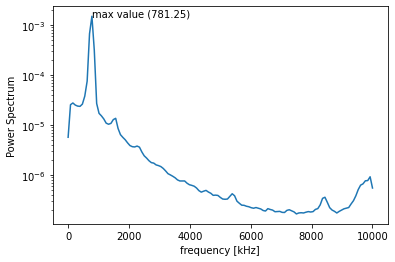


Velocity:  6.098914196
Max Frequency value:  937.5


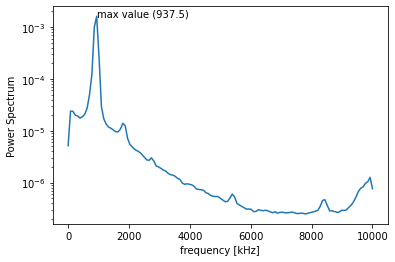


Velocity:  7.079225808000001
Max Frequency value:  1093.75


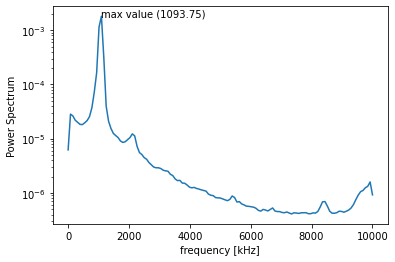


Velocity:  7.985860968000001
Max Frequency value:  1250.0


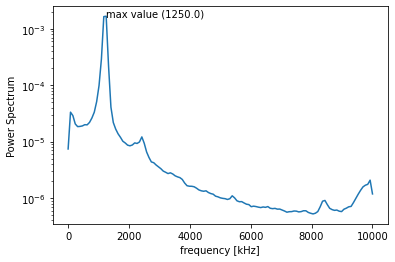


Velocity:  8.975018219999999
Max Frequency value:  1406.25


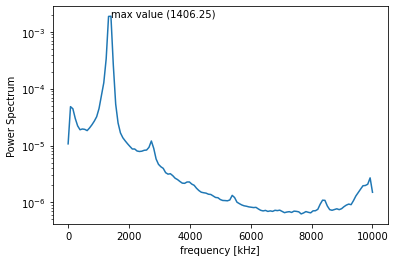


Velocity:  9.845077088
Max Frequency value:  1484.375


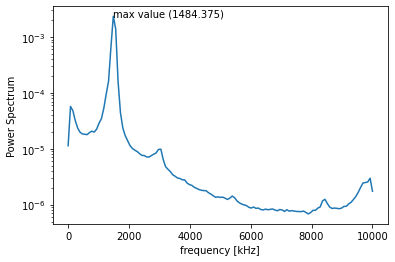


Velocity:  10.771644996
Max Frequency value:  1640.625


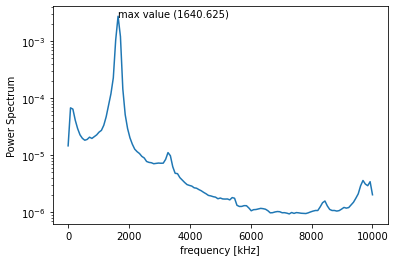


Velocity:  11.7580455
Max Frequency value:  1796.875


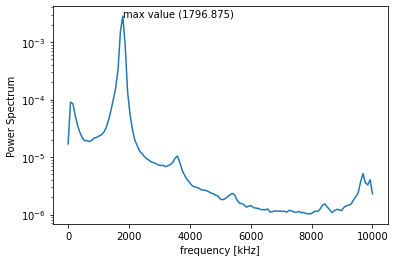


Velocity:  12.695803571999999
Max Frequency value:  1953.125


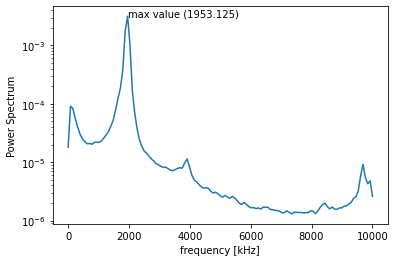


Velocity:  13.7075215
Max Frequency value:  2109.375


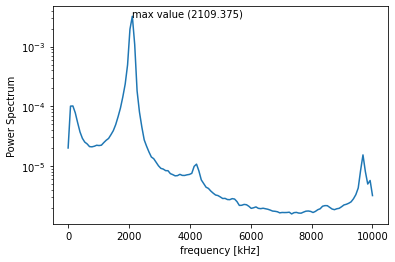


Velocity:  14.583961252
Max Frequency value:  2187.5


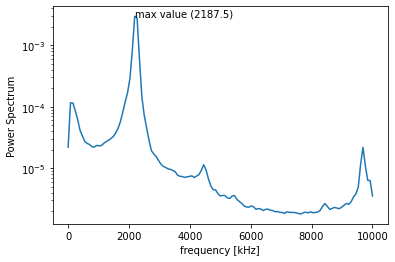

In [35]:
df = pd.read_csv(path_mat + ustream[-1], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 0*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

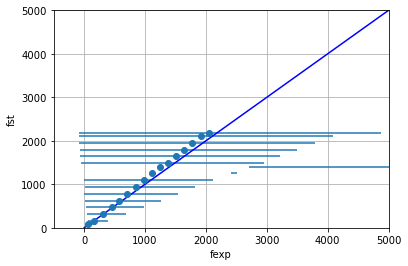

In [36]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')



## y-1

Velocity:  0.724002752
Max Frequency value:  78.125


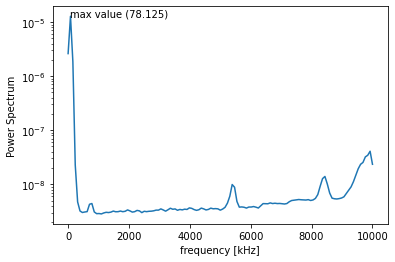


Velocity:  1.423315004
Max Frequency value:  78.125


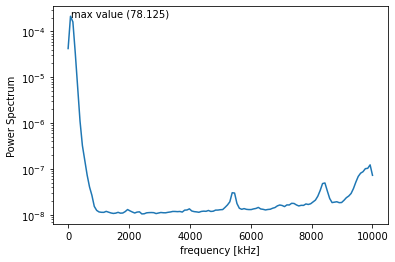


Velocity:  2.372744168
Max Frequency value:  312.5


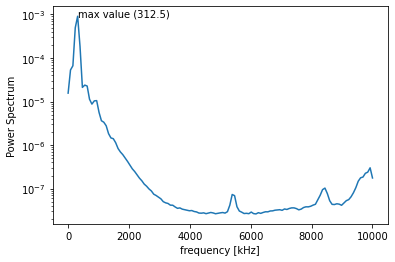


Velocity:  3.3091109840000006
Max Frequency value:  390.625


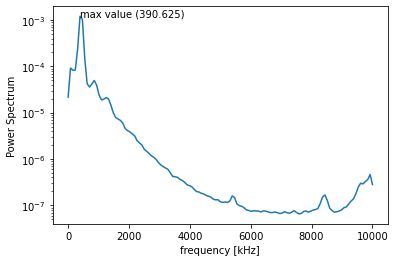


Velocity:  4.2536707520000006
Max Frequency value:  546.875


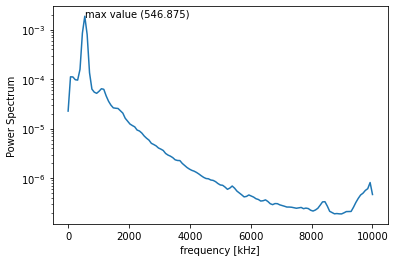


Velocity:  5.15889748
Max Frequency value:  703.125


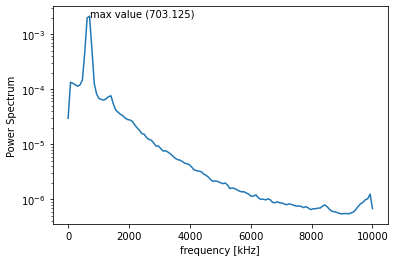


Velocity:  6.110593876
Max Frequency value:  781.25


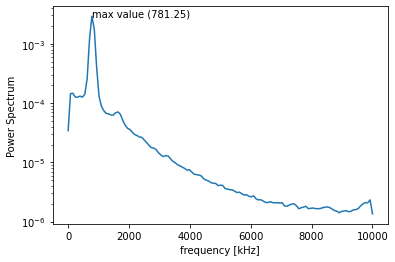


Velocity:  7.044616168000001
Max Frequency value:  937.5


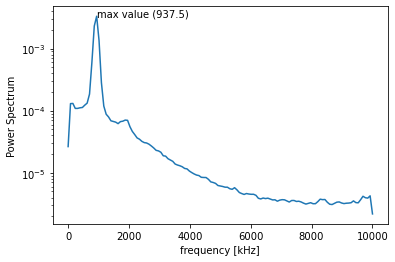


Velocity:  7.986419188
Max Frequency value:  1015.625


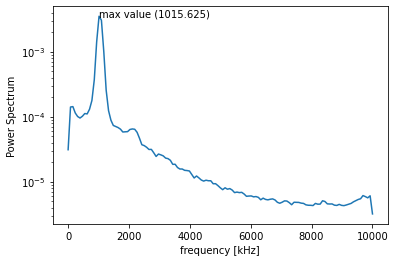


Velocity:  8.968182171999999
Max Frequency value:  1171.875


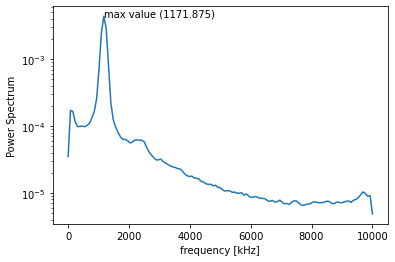


Velocity:  9.93597248
Max Frequency value:  1328.125


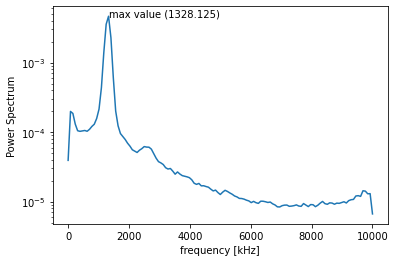


Velocity:  10.901598611999999
Max Frequency value:  1406.25


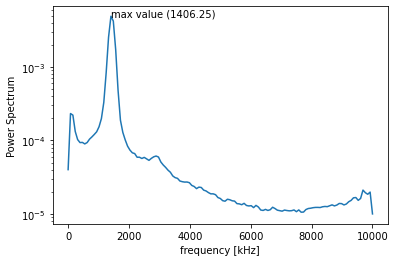


Velocity:  11.750994752
Max Frequency value:  1562.5


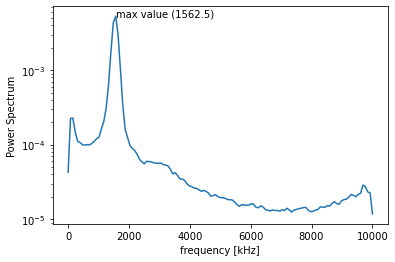


Velocity:  12.745450799999999
Max Frequency value:  1718.75


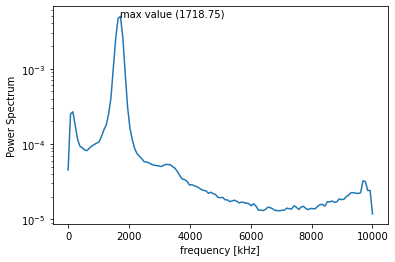


Velocity:  13.706302004
Max Frequency value:  1796.875


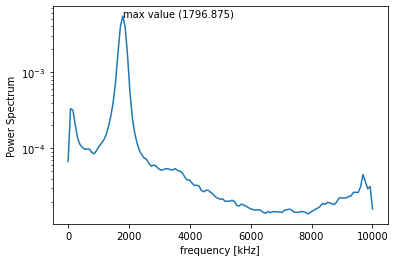


Velocity:  14.580422996
Max Frequency value:  1875.0


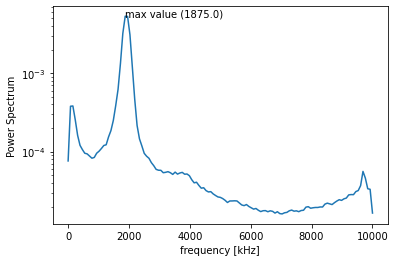

In [37]:
df1 = pd.read_csv(path_mat + ustream[-2], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 1*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df1[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

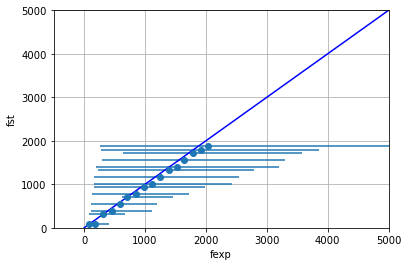

In [38]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

### Y0

Velocity:  0.70387248
Max Frequency value:  78.125


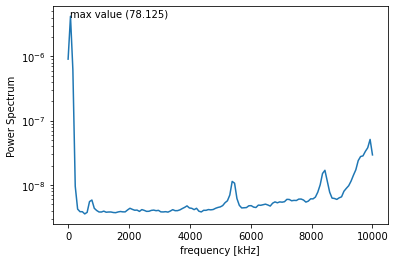


Velocity:  1.420618372
Max Frequency value:  78.125


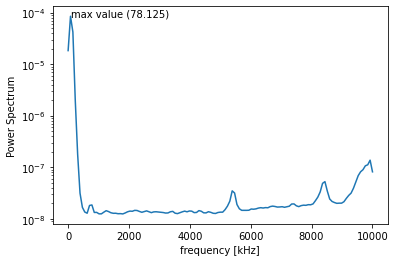


Velocity:  2.354520432
Max Frequency value:  312.5


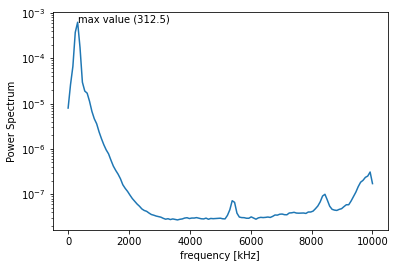


Velocity:  3.302996328
Max Frequency value:  390.625


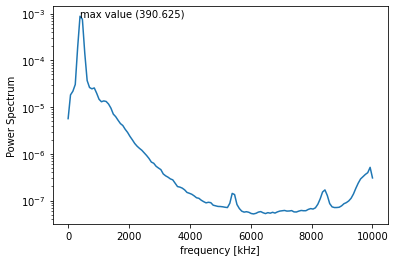


Velocity:  4.11124736
Max Frequency value:  546.875


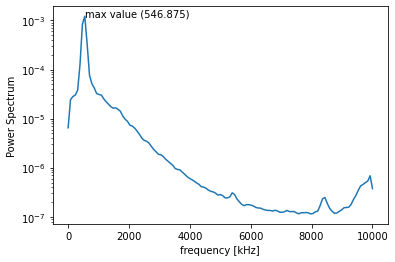


Velocity:  5.1826347120000005
Max Frequency value:  703.125


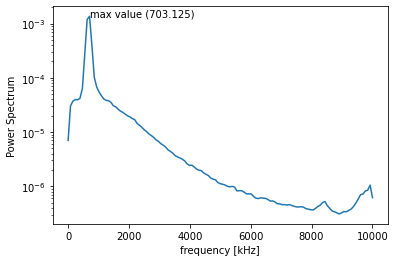


Velocity:  6.1157380880000005
Max Frequency value:  781.25


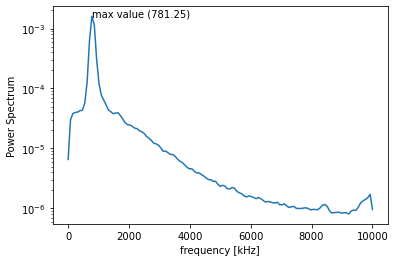


Velocity:  7.012874920000001
Max Frequency value:  937.5


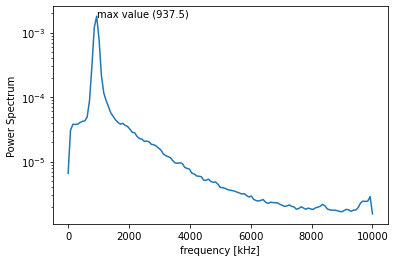


Velocity:  7.9668729
Max Frequency value:  1093.75


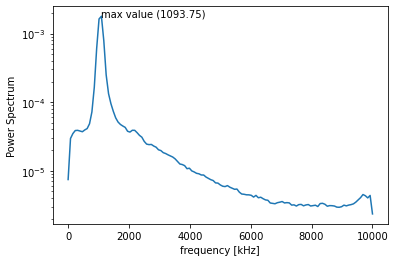


Velocity:  8.967958884
Max Frequency value:  1171.875


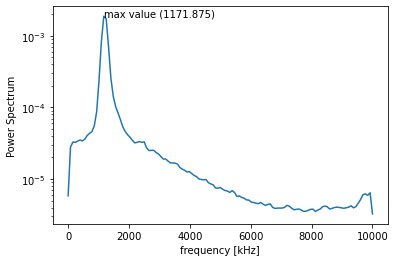


Velocity:  9.834299148000001
Max Frequency value:  1328.125


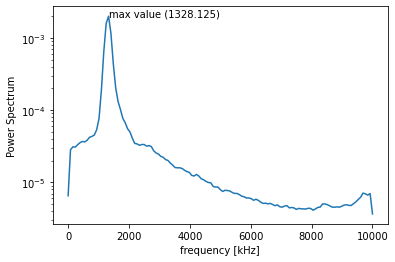


Velocity:  10.775810176
Max Frequency value:  1484.375


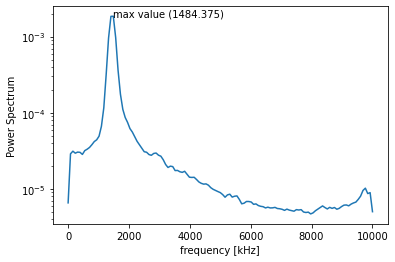


Velocity:  11.762030331999998
Max Frequency value:  1562.5


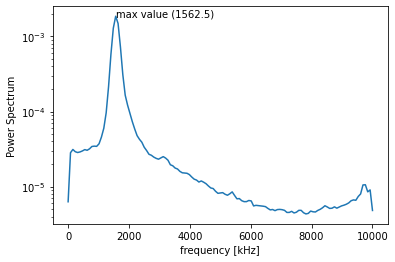


Velocity:  12.777776031999998
Max Frequency value:  1718.75


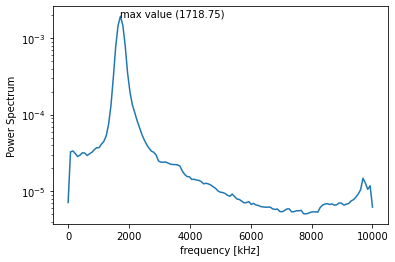


Velocity:  13.713223931999998
Max Frequency value:  1875.0


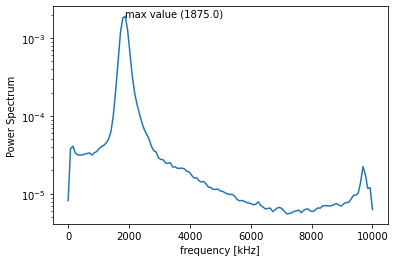


Velocity:  14.69518444
Max Frequency value:  1953.125


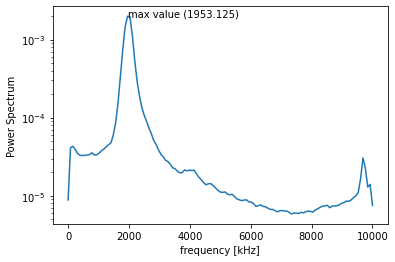

In [39]:
df2 = pd.read_csv(path_mat + ustream[1], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 2*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df2[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

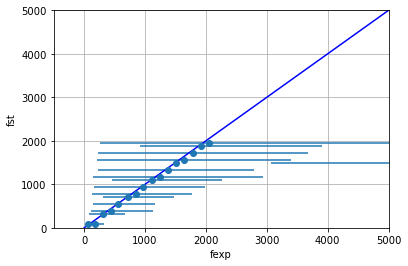

In [40]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

### Y1

Velocity:  0.694820728
Max Frequency value:  78.125


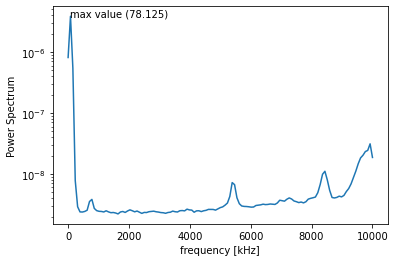


Velocity:  1.4413583920000002
Max Frequency value:  78.125


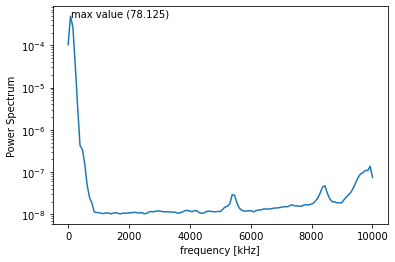


Velocity:  2.38432938
Max Frequency value:  312.5


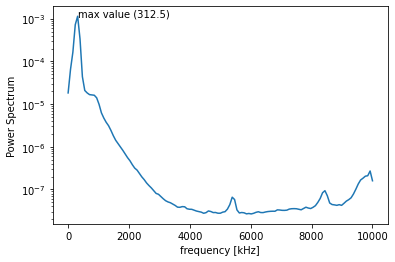


Velocity:  3.22925976
Max Frequency value:  390.625


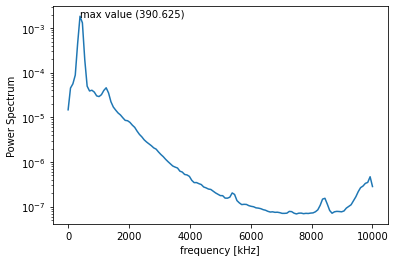


Velocity:  4.229109072
Max Frequency value:  546.875


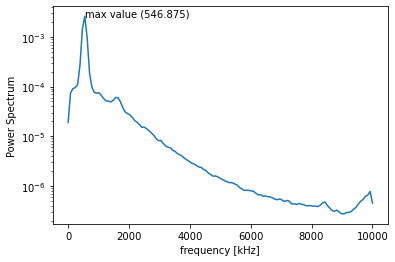


Velocity:  5.20321156
Max Frequency value:  703.125


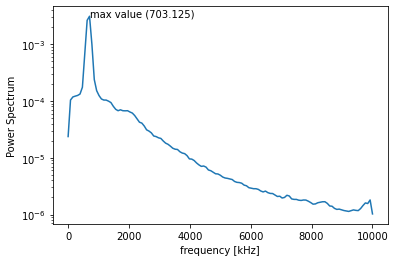


Velocity:  6.125313708
Max Frequency value:  781.25


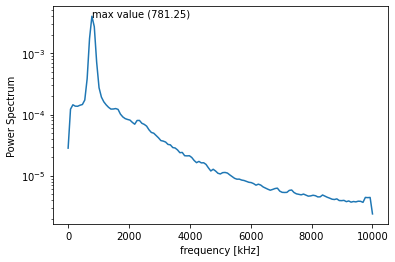


Velocity:  7.013415964
Max Frequency value:  937.5


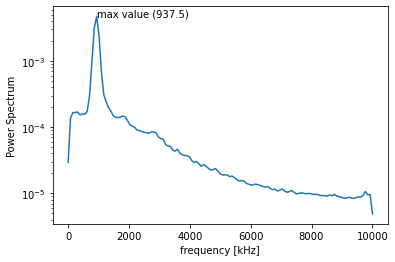


Velocity:  7.988703596000001
Max Frequency value:  1093.75


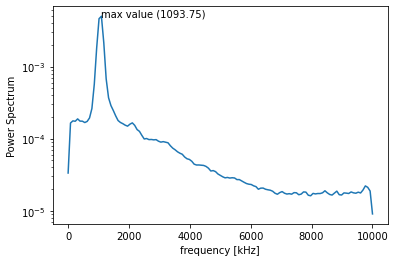


Velocity:  8.902629968000001
Max Frequency value:  1171.875


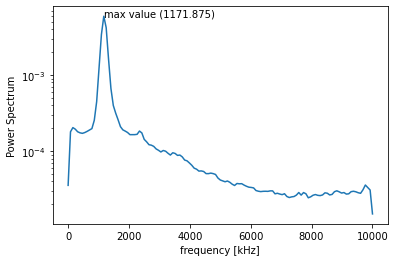


Velocity:  9.863970688
Max Frequency value:  1328.125


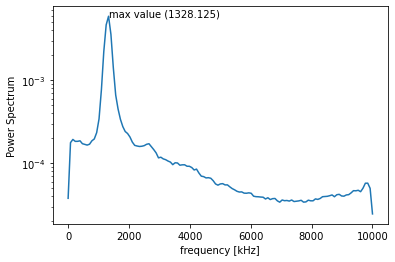


Velocity:  10.800466324
Max Frequency value:  1484.375


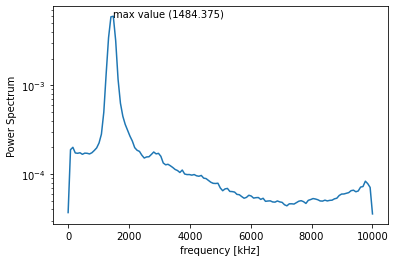


Velocity:  11.75242036
Max Frequency value:  1562.5


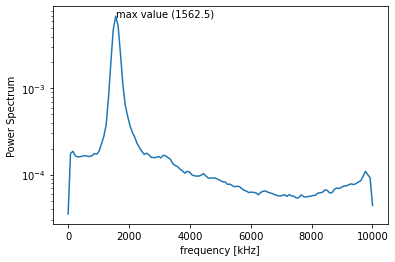


Velocity:  12.74433436
Max Frequency value:  1718.75


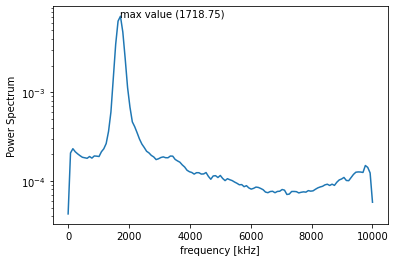


Velocity:  13.61399818
Max Frequency value:  1796.875


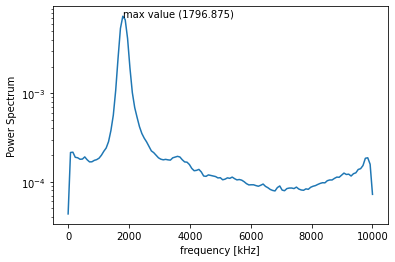


Velocity:  14.630319276
Max Frequency value:  1953.125


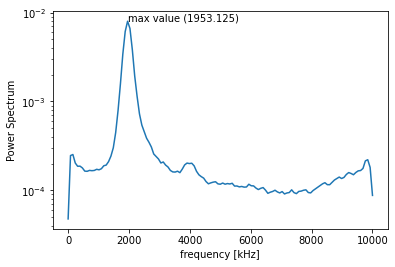

In [41]:
df3 = pd.read_csv(path_mat + ustream[2], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 3*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df3[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

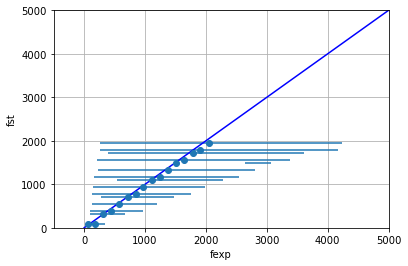

In [42]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y2

Velocity:  0.65019748
Max Frequency value:  156.25


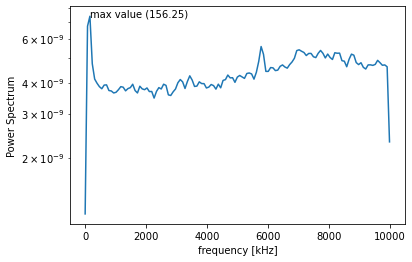


Velocity:  1.4448193560000002
Max Frequency value:  156.25


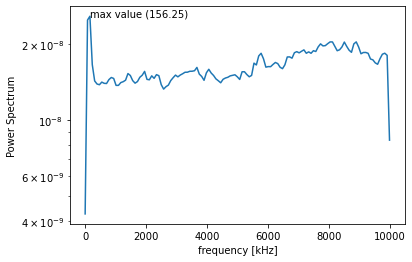


Velocity:  2.338409344
Max Frequency value:  156.25


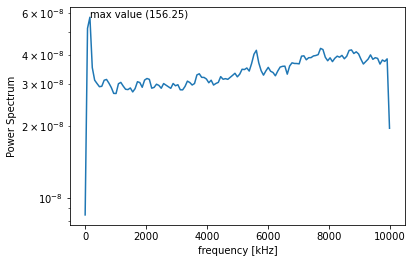


Velocity:  3.222578296
Max Frequency value:  156.25


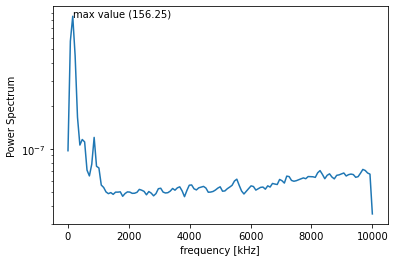


Velocity:  4.245572268
Max Frequency value:  1250.0


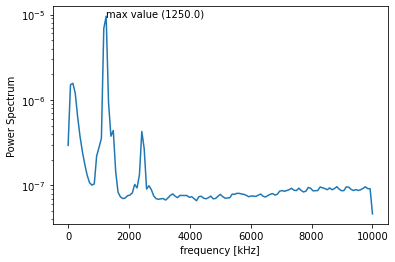


Velocity:  5.19732878
Max Frequency value:  1640.625


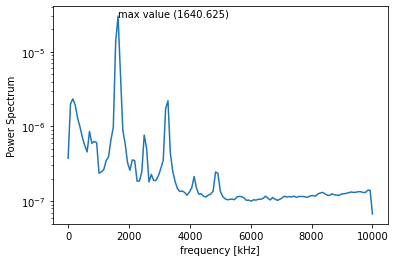


Velocity:  6.1120710119999995
Max Frequency value:  2031.25


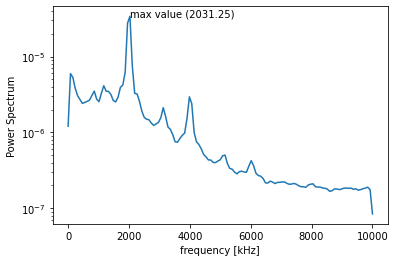


Velocity:  7.02489812
Max Frequency value:  2421.875


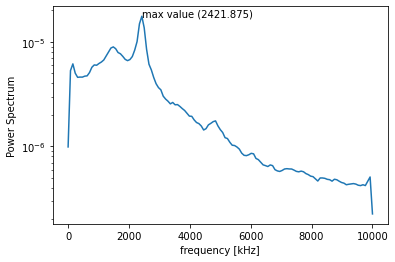


Velocity:  8.042430124
Max Frequency value:  2812.5


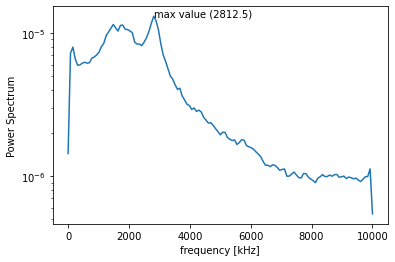


Velocity:  8.907061376
Max Frequency value:  1640.625


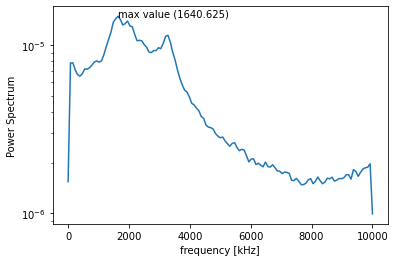


Velocity:  9.893049656
Max Frequency value:  78.125


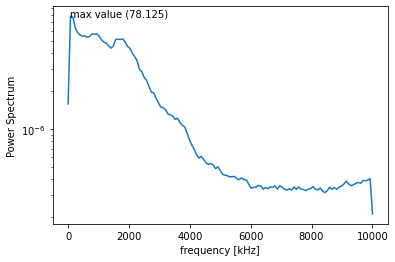


Velocity:  10.842152476
Max Frequency value:  156.25


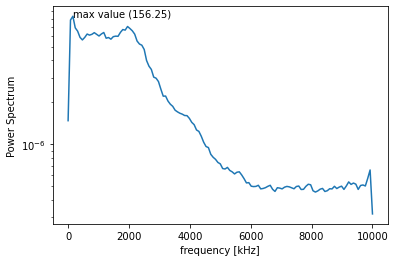


Velocity:  11.790224736
Max Frequency value:  156.25


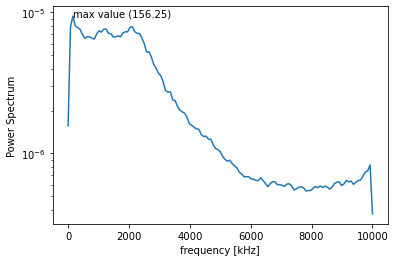


Velocity:  12.740976452
Max Frequency value:  156.25


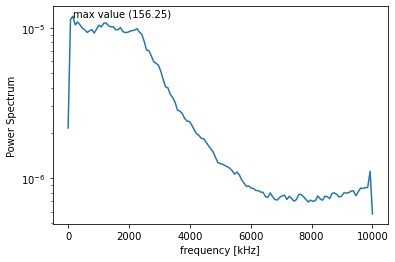


Velocity:  13.679181100000001
Max Frequency value:  156.25


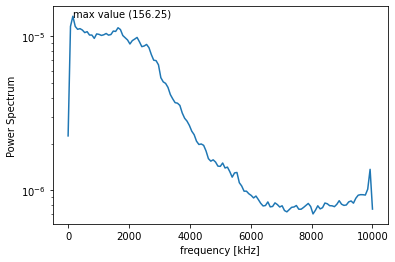


Velocity:  14.705086404000001
Max Frequency value:  156.25


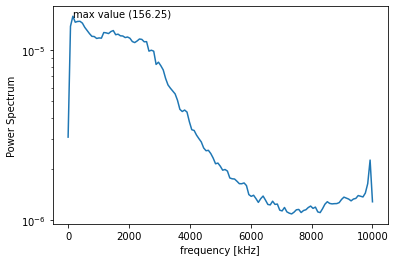

In [43]:
df4 = pd.read_csv(path_mat + ustream[3], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 4*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df4[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

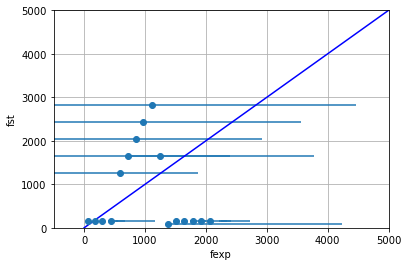

In [44]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y3

Velocity:  0.6739432999999999
Max Frequency value:  78.125


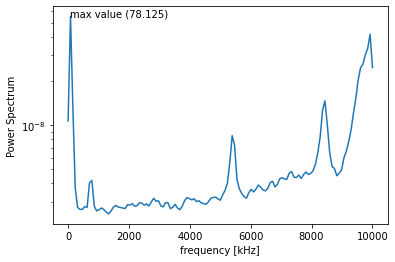


Velocity:  1.4279782879999998
Max Frequency value:  78.125


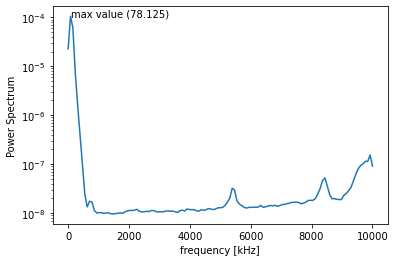


Velocity:  2.357586348
Max Frequency value:  312.5


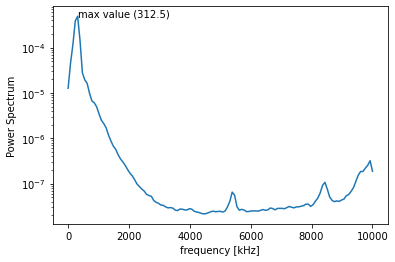


Velocity:  3.236310508
Max Frequency value:  390.625


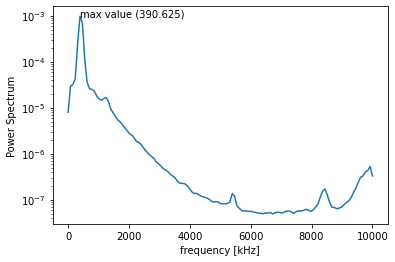


Velocity:  4.170599028
Max Frequency value:  546.875


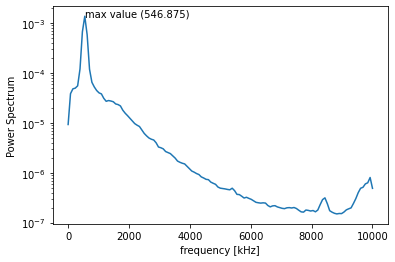


Velocity:  5.116764752000001
Max Frequency value:  703.125


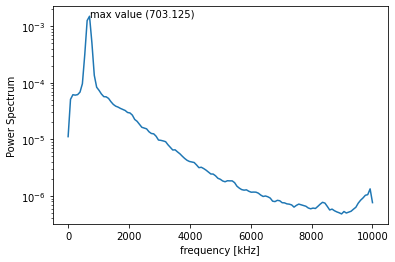


Velocity:  6.146843824
Max Frequency value:  781.25


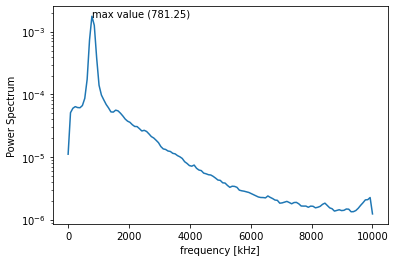


Velocity:  7.017735728000001
Max Frequency value:  937.5


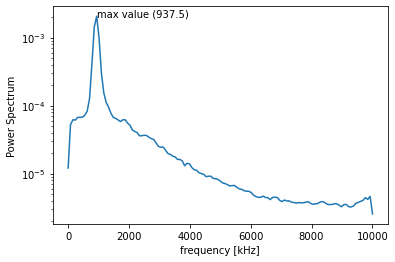


Velocity:  8.008851044
Max Frequency value:  1093.75


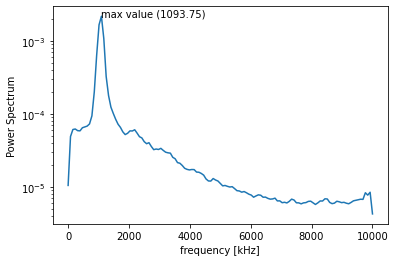


Velocity:  8.919093164000001
Max Frequency value:  1171.875


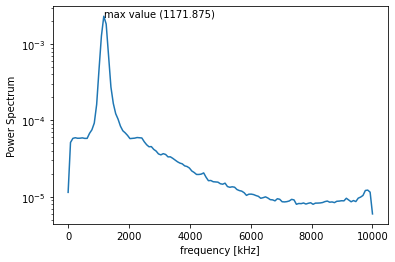


Velocity:  9.855391275999999
Max Frequency value:  1328.125


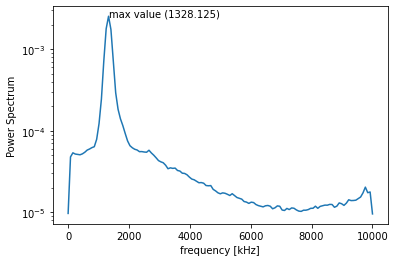


Velocity:  10.811175559999999
Max Frequency value:  1484.375


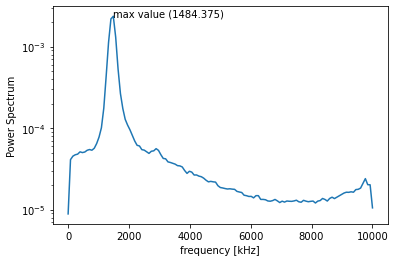


Velocity:  11.682505452
Max Frequency value:  1562.5


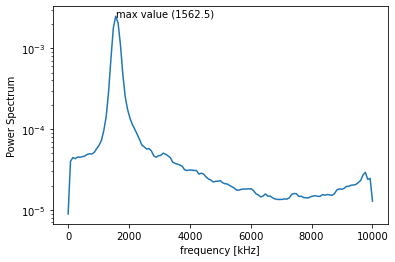


Velocity:  12.790340276
Max Frequency value:  1718.75


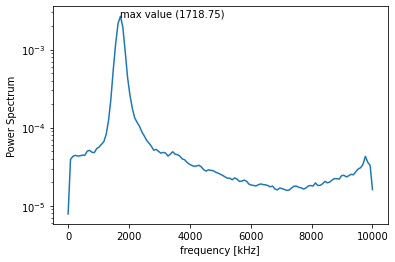


Velocity:  13.616832220000001
Max Frequency value:  1796.875


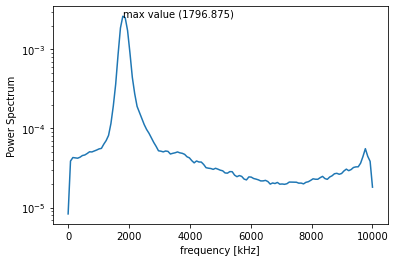


Velocity:  14.631427128
Max Frequency value:  1953.125


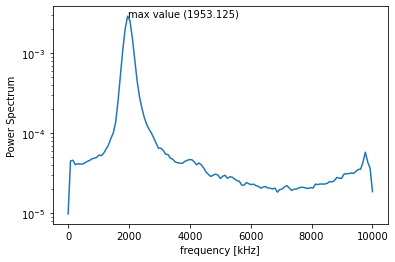

In [45]:
df5 = pd.read_csv(path_mat + ustream[4], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 5*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df5[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    else:
        Fst.append(1000)
        
    counter += 1

Text(0, 0.5, 'fst')

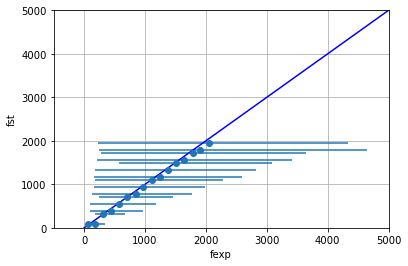

In [46]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y4

Velocity:  0.7242518039999999
Max Frequency value:  78.125


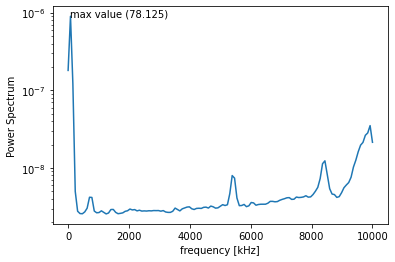


Velocity:  1.41817938
Max Frequency value:  78.125


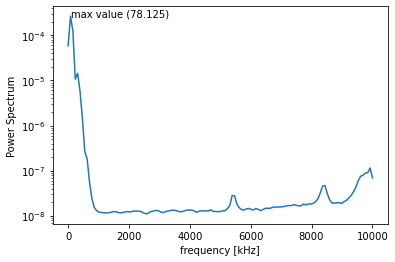


Velocity:  2.3658737679999997
Max Frequency value:  234.375


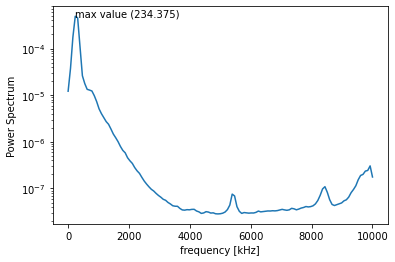


Velocity:  3.275686488
Max Frequency value:  390.625


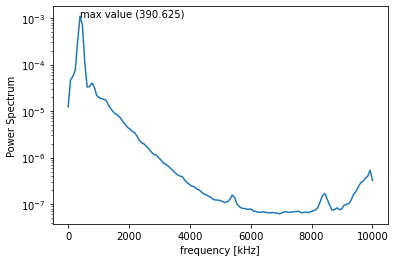


Velocity:  4.243150452
Max Frequency value:  546.875


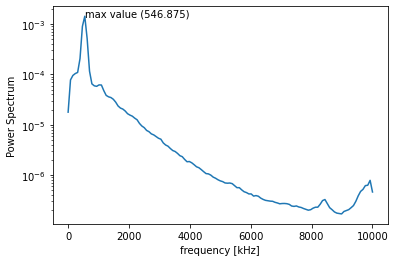


Velocity:  5.1439801240000005
Max Frequency value:  703.125


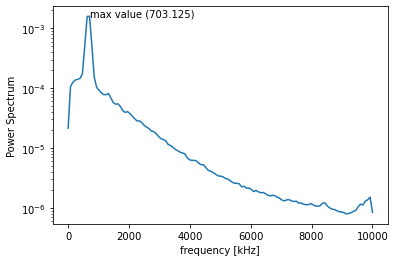


Velocity:  6.0806818719999995
Max Frequency value:  781.25


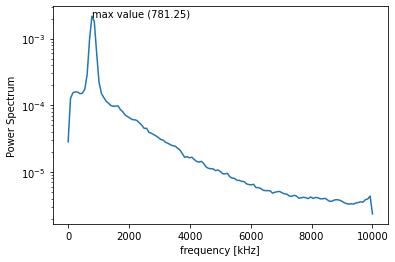


Velocity:  7.032300976
Max Frequency value:  937.5


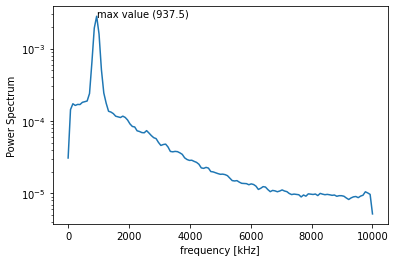


Velocity:  8.048373020000001
Max Frequency value:  1093.75


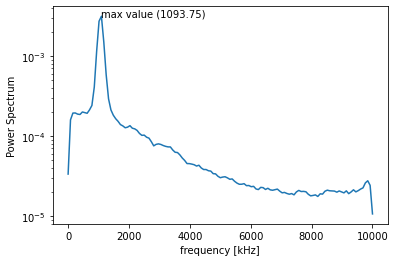


Velocity:  8.939730128
Max Frequency value:  1171.875


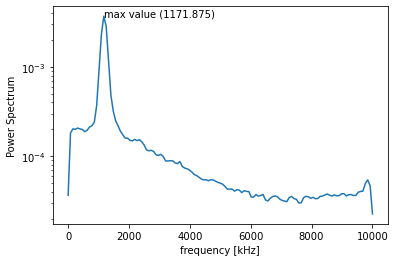


Velocity:  9.984717968
Max Frequency value:  1328.125


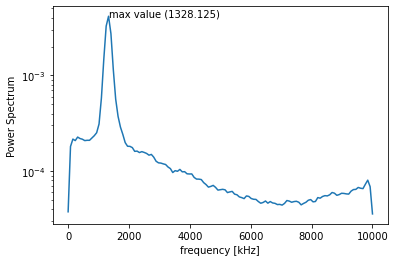


Velocity:  10.813434204000002
Max Frequency value:  1484.375


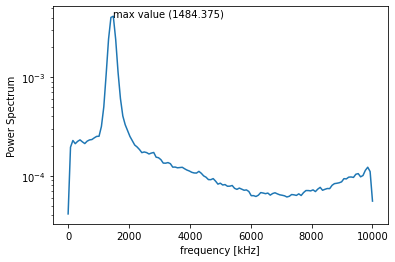


Velocity:  11.797301248
Max Frequency value:  1562.5


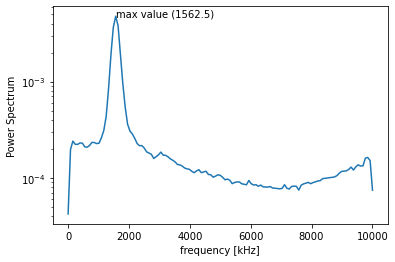


Velocity:  12.718484479999999
Max Frequency value:  1718.75


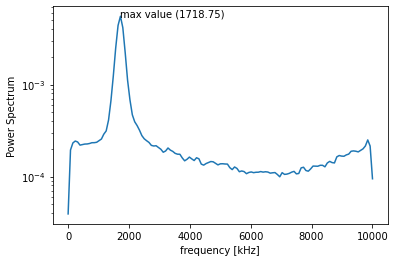


Velocity:  13.601064652
Max Frequency value:  1796.875


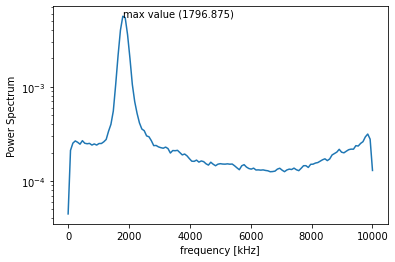


Velocity:  14.659664472
Max Frequency value:  1953.125


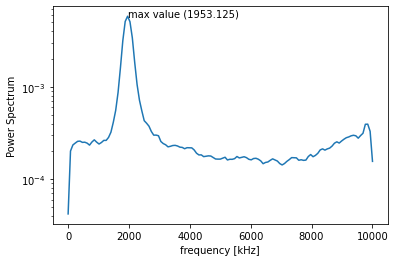

In [47]:
df6 = pd.read_csv(path_mat + ustream[5], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 6*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df6[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

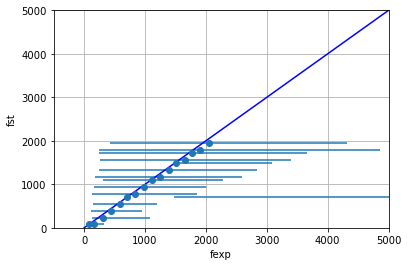

In [48]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y5

Velocity:  0.687323404
Max Frequency value:  78.125


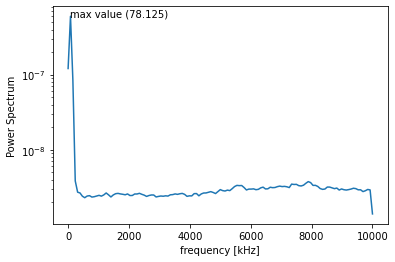


Velocity:  1.373899652
Max Frequency value:  78.125


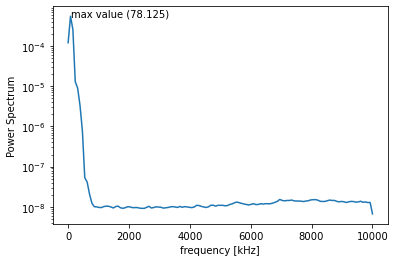


Velocity:  2.3723748839999996
Max Frequency value:  234.375


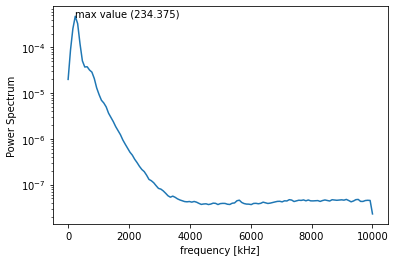


Velocity:  3.2842487240000002
Max Frequency value:  390.625


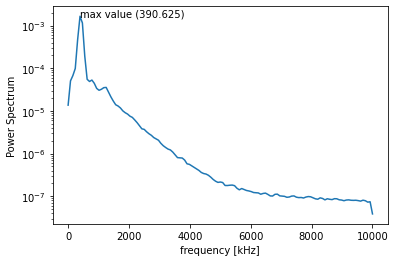


Velocity:  4.204057876
Max Frequency value:  546.875


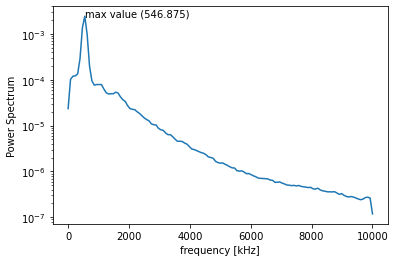


Velocity:  5.13914508
Max Frequency value:  625.0


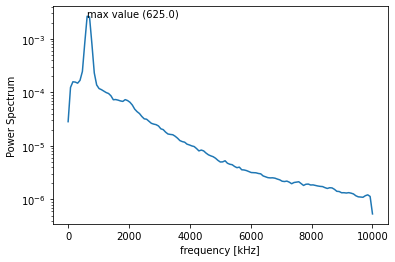


Velocity:  6.0589456440000005
Max Frequency value:  781.25


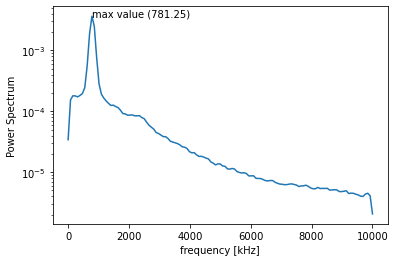


Velocity:  7.076795404
Max Frequency value:  937.5


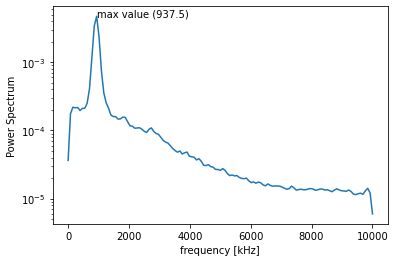


Velocity:  7.911334304
Max Frequency value:  1093.75


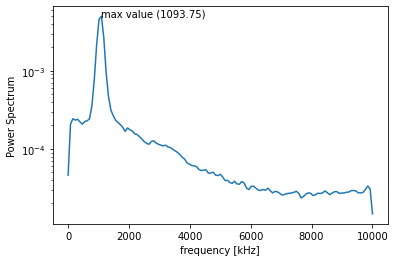


Velocity:  8.948060488000001
Max Frequency value:  1171.875


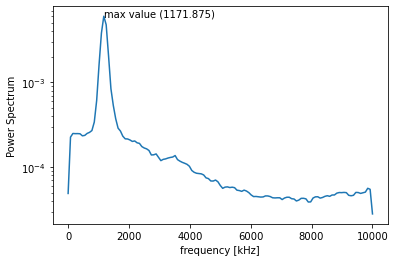


Velocity:  9.9144166
Max Frequency value:  1328.125


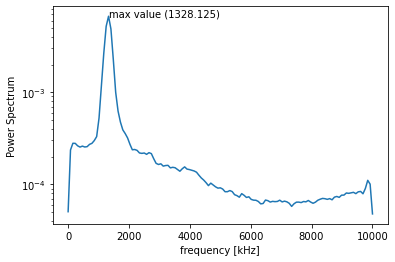


Velocity:  10.855386584000001
Max Frequency value:  1406.25


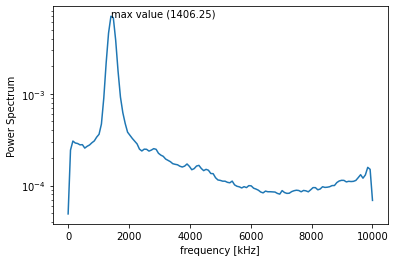


Velocity:  11.760475904
Max Frequency value:  1562.5


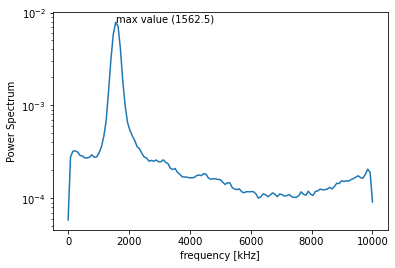


Velocity:  12.766680336000002
Max Frequency value:  1718.75


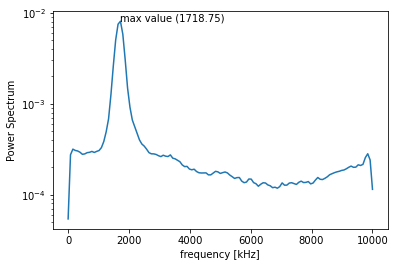


Velocity:  13.733895248000001
Max Frequency value:  1796.875


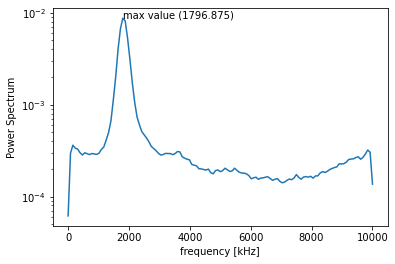


Velocity:  14.624307676
Max Frequency value:  1953.125


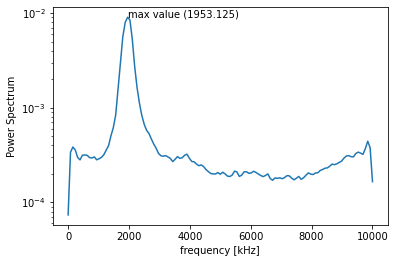

In [49]:
df7 = pd.read_csv(path_mat + ustream[6], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 7*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df7[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

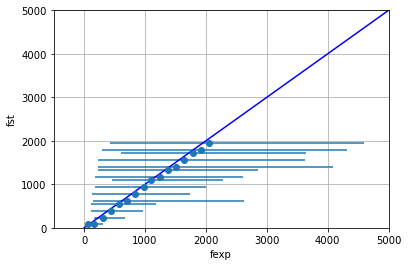

In [50]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y6

Velocity:  0.8000752560000001
Max Frequency value:  78.125


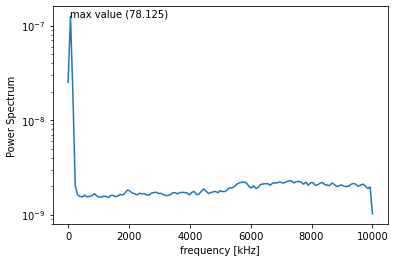


Velocity:  1.411884376
Max Frequency value:  78.125


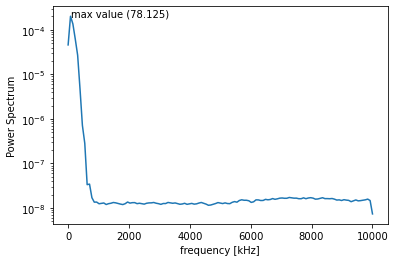


Velocity:  2.312610992
Max Frequency value:  234.375


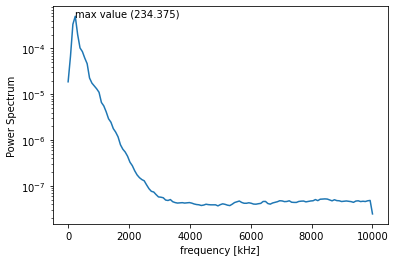


Velocity:  3.25004272
Max Frequency value:  390.625


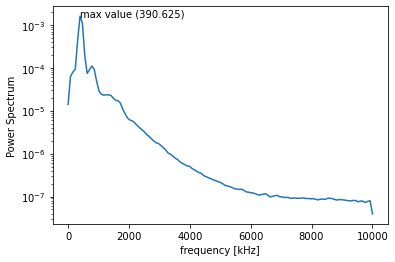


Velocity:  4.20691768
Max Frequency value:  546.875


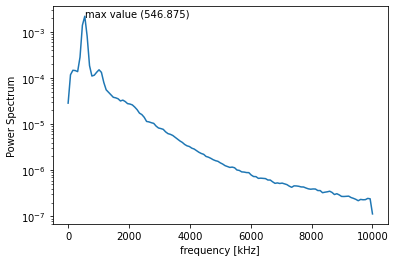


Velocity:  5.256766328
Max Frequency value:  625.0


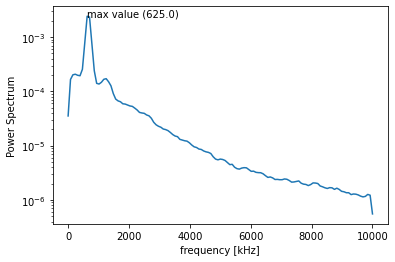


Velocity:  6.131866351999999
Max Frequency value:  781.25


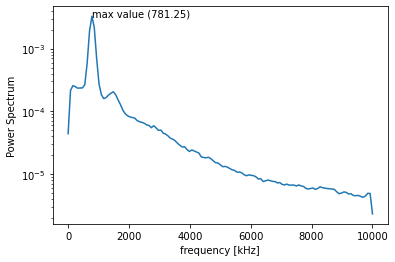


Velocity:  7.035650296
Max Frequency value:  937.5


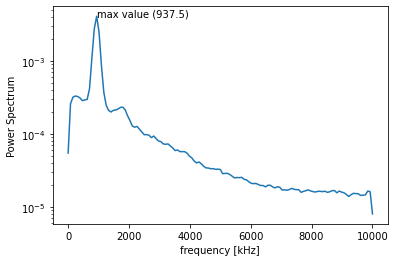


Velocity:  8.021200588000001
Max Frequency value:  1015.625


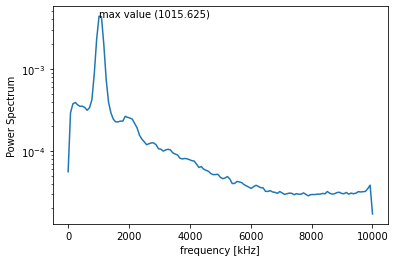


Velocity:  9.01916054
Max Frequency value:  1171.875


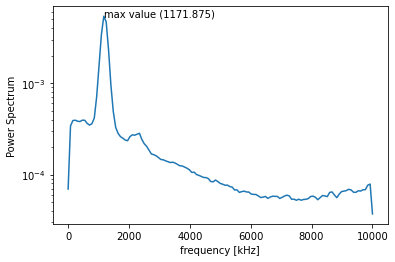


Velocity:  9.861591811999999
Max Frequency value:  1328.125


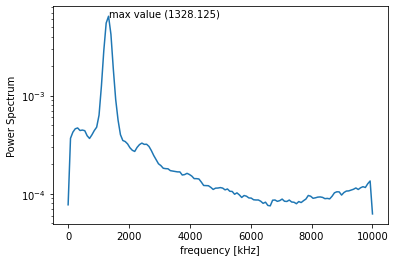


Velocity:  10.847485624
Max Frequency value:  1484.375


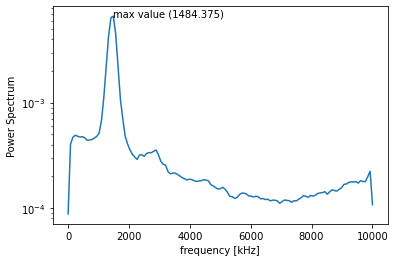


Velocity:  11.72747222
Max Frequency value:  1562.5


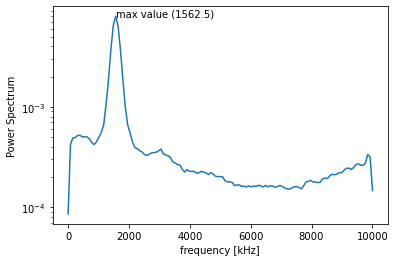


Velocity:  12.754536903999998
Max Frequency value:  1718.75


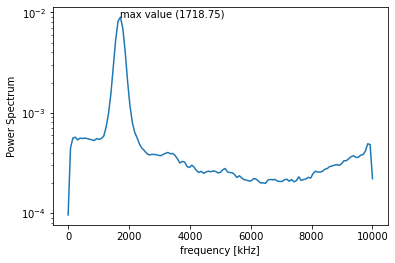


Velocity:  13.725822528000002
Max Frequency value:  1796.875


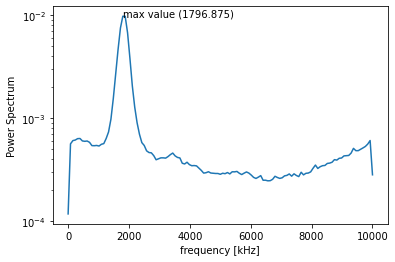


Velocity:  14.544052816
Max Frequency value:  1953.125


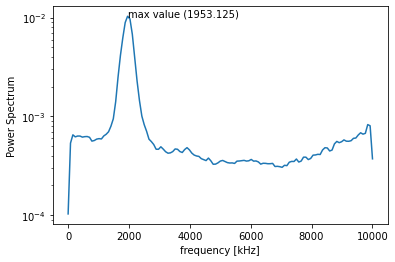

In [51]:
df8 = pd.read_csv(path_mat + ustream[7], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 8*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df8[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

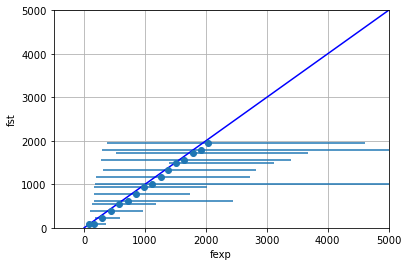

In [52]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y7

Velocity:  0.67067986
Max Frequency value:  78.125


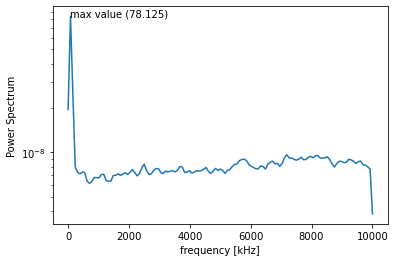


Velocity:  1.3976197080000001
Max Frequency value:  78.125


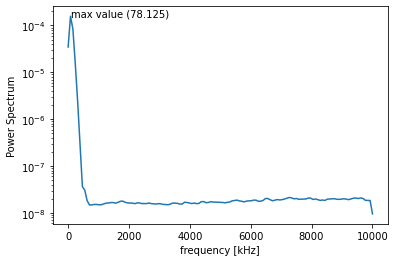


Velocity:  2.32275342
Max Frequency value:  234.375


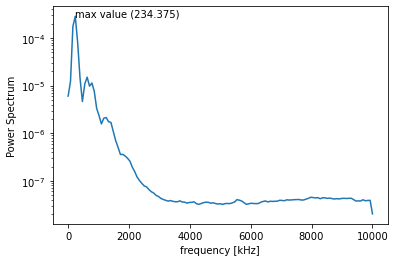


Velocity:  3.253168752
Max Frequency value:  390.625


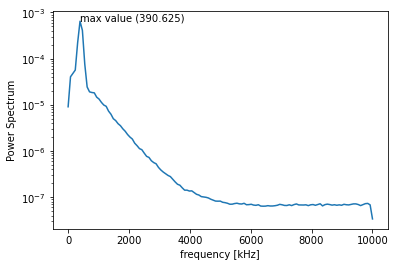


Velocity:  4.177821536
Max Frequency value:  546.875


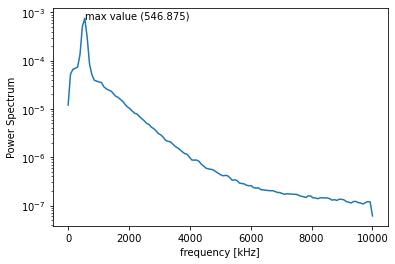


Velocity:  5.256895148
Max Frequency value:  703.125


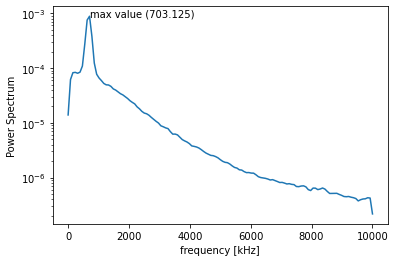


Velocity:  6.0572366319999995
Max Frequency value:  781.25


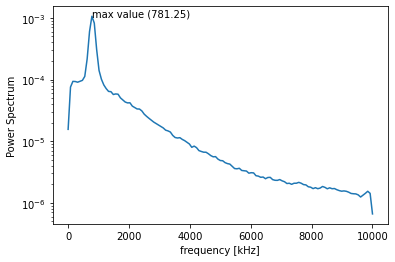


Velocity:  7.082437720000001
Max Frequency value:  937.5


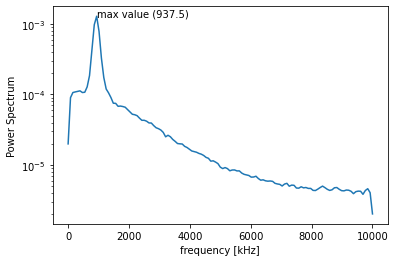


Velocity:  7.996553028000001
Max Frequency value:  1093.75


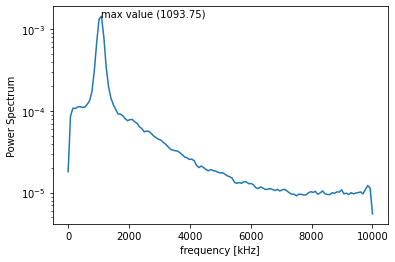


Velocity:  9.05063556
Max Frequency value:  1171.875


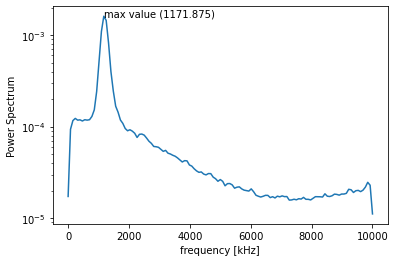


Velocity:  9.84214858
Max Frequency value:  1328.125


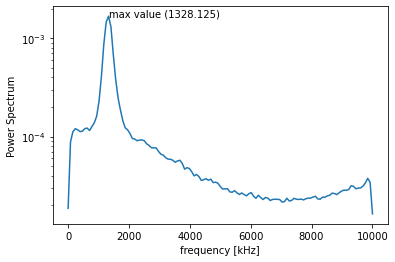


Velocity:  10.842753636
Max Frequency value:  1484.375


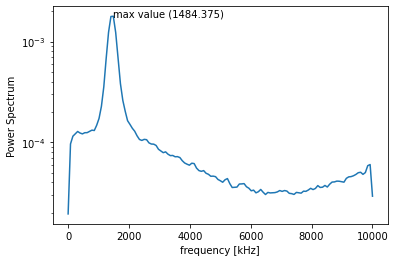


Velocity:  11.753459508
Max Frequency value:  1562.5


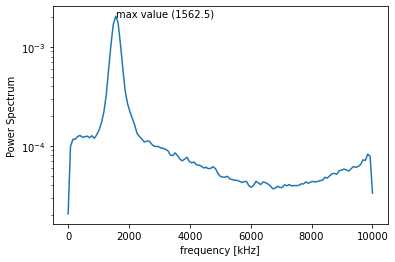


Velocity:  12.708900272
Max Frequency value:  1718.75


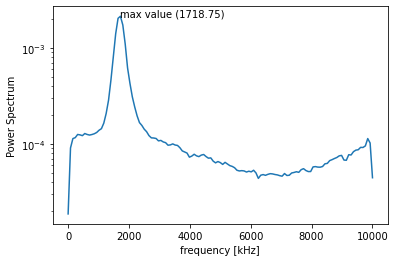


Velocity:  13.697147196000001
Max Frequency value:  1875.0


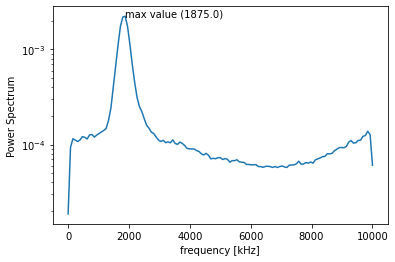


Velocity:  14.732859996000002
Max Frequency value:  1953.125


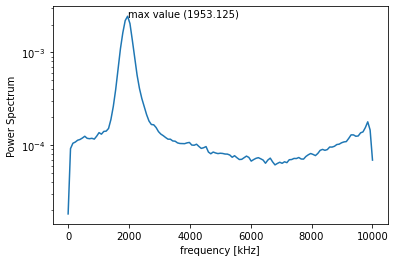

In [53]:
df9 = pd.read_csv(path_mat + ustream[8], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 9*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df9[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

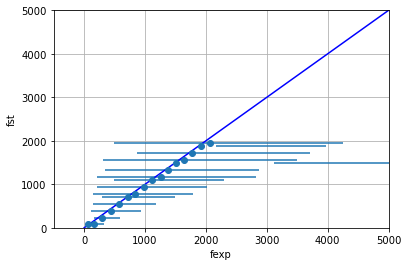

In [54]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y8

Velocity:  0.721469292
Max Frequency value:  78.125


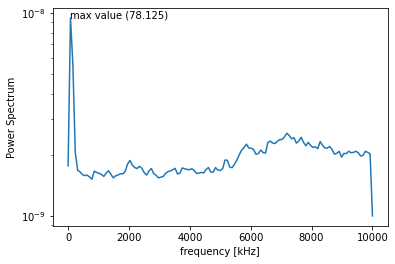


Velocity:  1.41586062
Max Frequency value:  78.125


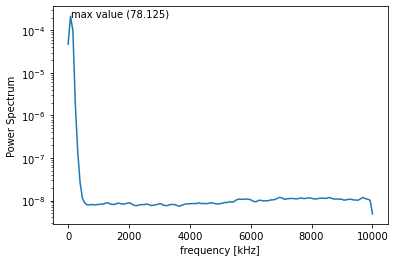


Velocity:  2.3593383
Max Frequency value:  234.375


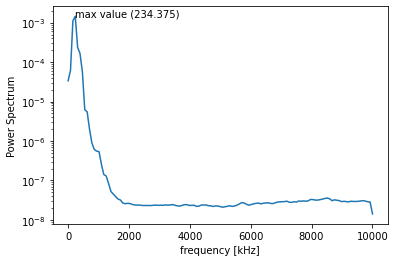


Velocity:  3.2794737959999996
Max Frequency value:  390.625


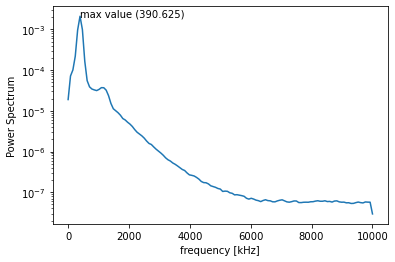


Velocity:  4.173999876
Max Frequency value:  546.875


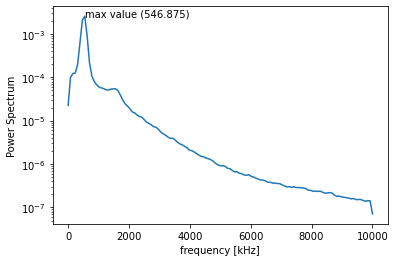


Velocity:  5.193962284
Max Frequency value:  703.125


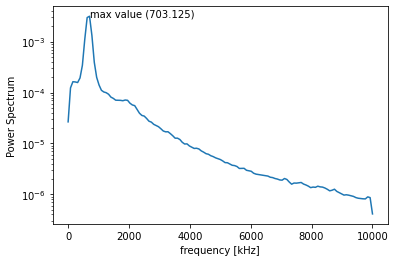


Velocity:  6.12964206
Max Frequency value:  781.25


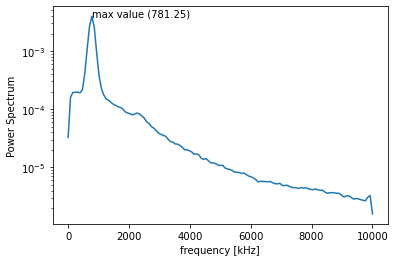


Velocity:  7.066240752
Max Frequency value:  937.5


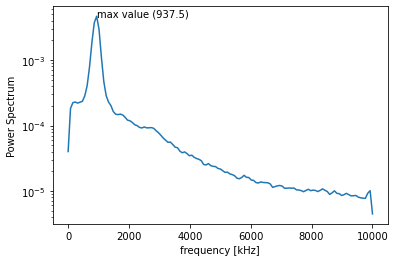


Velocity:  8.023012655999999
Max Frequency value:  1015.625


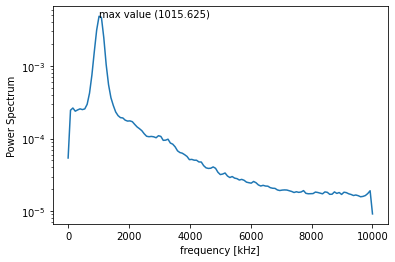


Velocity:  8.928831956
Max Frequency value:  1171.875


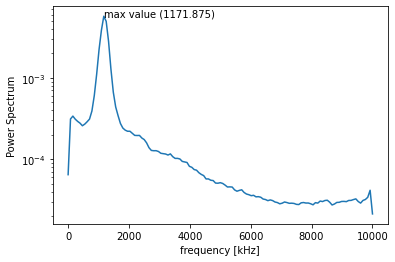


Velocity:  9.873958532
Max Frequency value:  1250.0


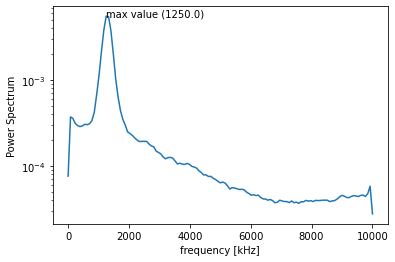


Velocity:  10.848430304
Max Frequency value:  1406.25


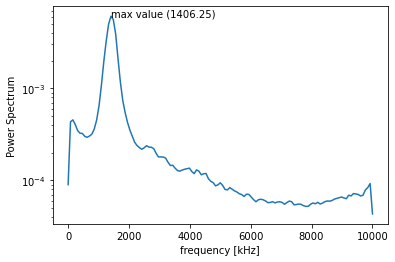


Velocity:  11.810981931999999
Max Frequency value:  1562.5


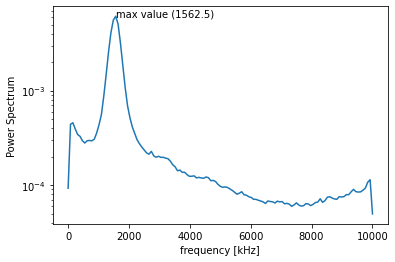


Velocity:  12.714353652
Max Frequency value:  1640.625


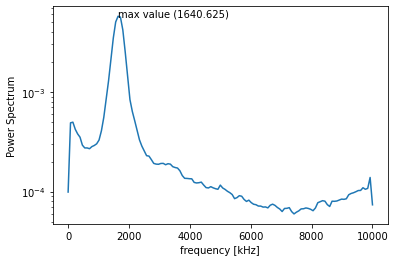


Velocity:  13.69880468
Max Frequency value:  1796.875


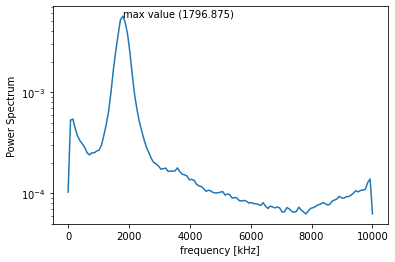


Velocity:  14.668492936
Max Frequency value:  1953.125


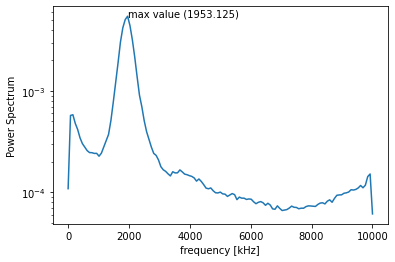

In [55]:
df10 = pd.read_csv(path_mat + ustream[9], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 10*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df10[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

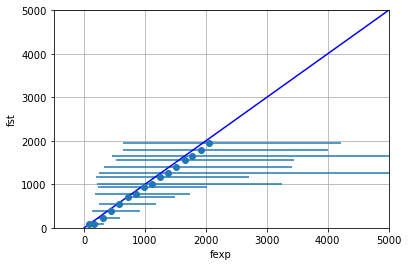

In [56]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y9

Velocity:  0.7366614639999999
Max Frequency value:  78.125


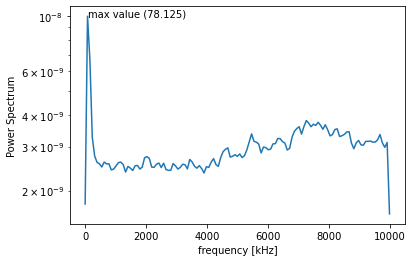


Velocity:  1.396949844
Max Frequency value:  78.125


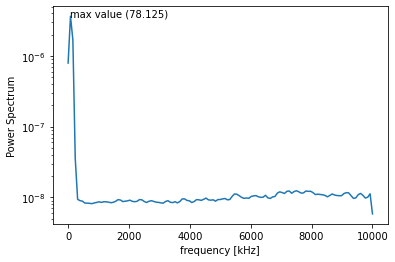


Velocity:  2.3596302920000003
Max Frequency value:  234.375


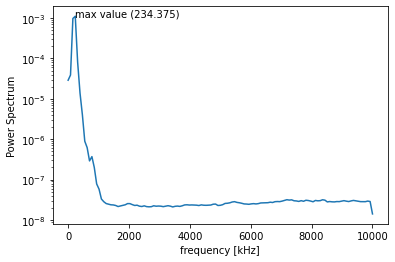


Velocity:  3.26404116
Max Frequency value:  390.625


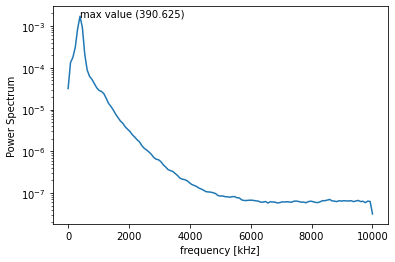


Velocity:  4.203688592000001
Max Frequency value:  546.875


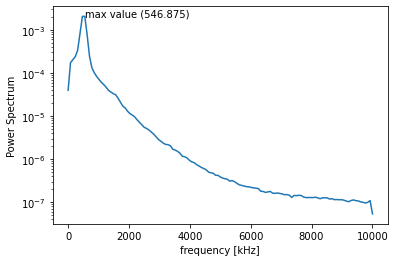


Velocity:  5.195302012000001
Max Frequency value:  625.0


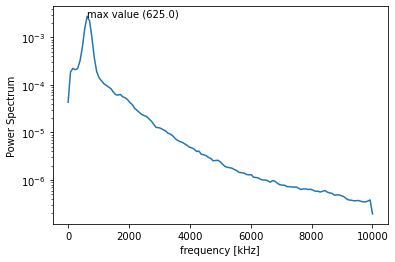


Velocity:  6.167712664000001
Max Frequency value:  781.25


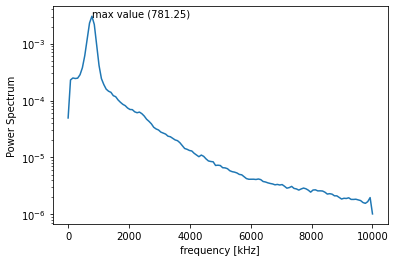


Velocity:  7.020191896
Max Frequency value:  937.5


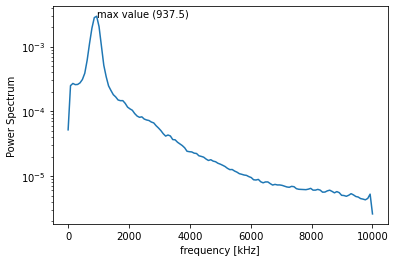


Velocity:  8.074102668
Max Frequency value:  1015.625


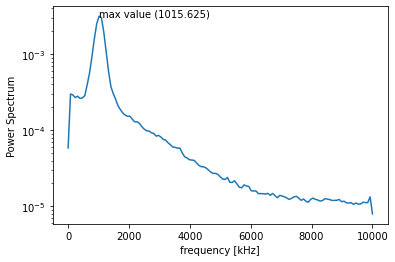


Velocity:  9.031072095999999
Max Frequency value:  1171.875


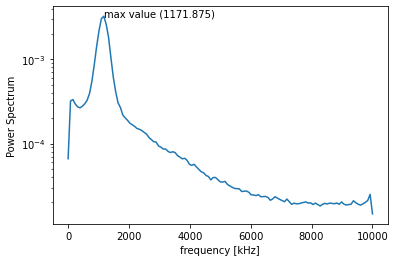


Velocity:  9.900924852
Max Frequency value:  1250.0


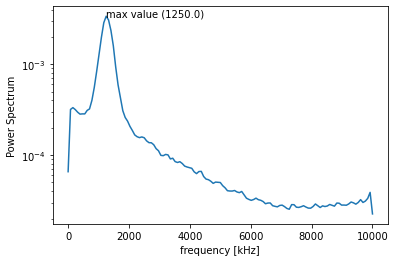


Velocity:  10.87588614
Max Frequency value:  1406.25


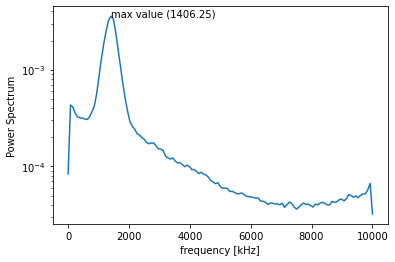


Velocity:  11.780546059999999
Max Frequency value:  1484.375


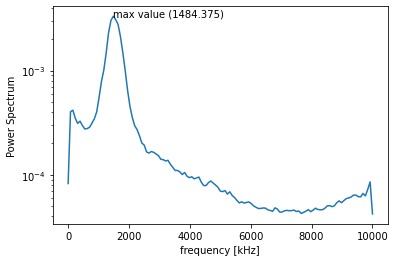


Velocity:  12.698809372
Max Frequency value:  1640.625


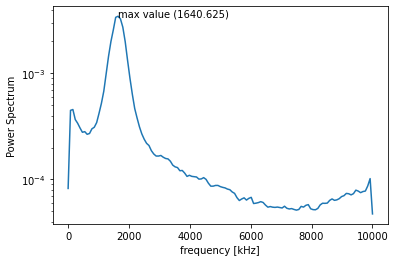


Velocity:  13.656629012
Max Frequency value:  1796.875


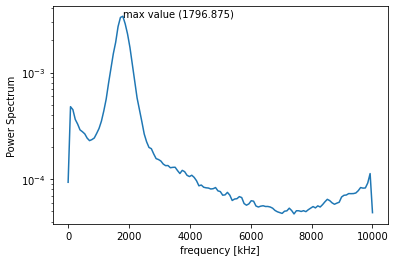


Velocity:  14.620262728000002
Max Frequency value:  1953.125


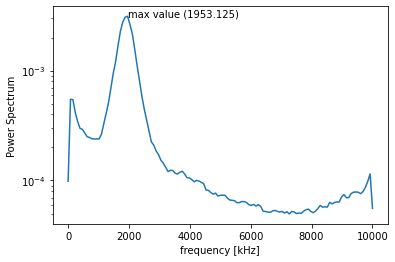

In [57]:
df11 = pd.read_csv(path_mat + ustream[10], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 11*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df11[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

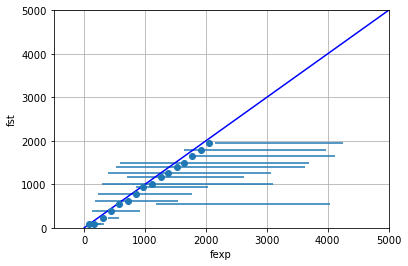

In [58]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')